In [1]:
import random
import glob
import pickle
from util import load_data

def K_fold_split(K=10, seed=0, fold=0):
    test_ratio = 1/K
    random.seed(seed)
    #不同折seed必须一样
    class_folders = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
    total_train_names = []
    total_test_names = []
    total_val_names = []
    for i, folder in enumerate(class_folders):
        name_list = glob.glob('data/original_data/type/%s/*.dat'%folder)
        random.shuffle(name_list)
        test_size = int(len(name_list) / K)
        val_size = test_size
        test_names = name_list[fold*test_size:(fold+1)*test_size]
        val_and_train_names = list(set(name_list)-set(test_names))
        val_names = random.sample(val_and_train_names, val_size)
        train_names = list(set(val_and_train_names)-set(val_names))
        total_train_names.append(train_names)
        total_test_names.append(test_names)
        total_val_names.append(val_names)
    return total_train_names, total_val_names, total_test_names

def load_original_data_K_fold(K=10, GP_limit=2500):
    for i in range(0, K):
        train_names, val_names, test_names = K_fold_split(K, fold=i)
        print('loading data %dfold No%d'%(K,i))
        train_data = [load_data(train_names[j], GP_model=True if len(train_names[j]) <= GP_limit else False) for j in range(0,11)]
        #预先拟合好GP_model可以加快bagging所需的重采样过程（不用反复拟合）
        #依然有重复计算，K折还是重复拟合了K倍，还可以优化一波，不过好像改起来比价麻烦，还是用计算机时间来节省我的时间吧
        #修改计划有，在util里，有需要再继续吧
        val_data = [load_data(val_names[j], GP_model=True) for j in range(0,11)]
        test_data = [load_data(test_names[j], GP_model=False) for j in range(0,11)]
        original_dataset = (train_data, val_data, test_data)
        f = open('data/original_dataset_%dfold_No%d'%(K,i), 'wb')
        pickle.dump(original_dataset, f)
        f.close()


In [ ]:
from util import create_dataset
original_dataset = 'data/original_dataset_0.60_0.30_0.10'
create_dataset(original_dataset,3000, down_sample=True, aug_val=True, image=True)

In [ ]:
from util import create_dataset
import os

def create_dataset_K_fold(K=10):
    for i in range(0, K):
        original_dataset = 'data/original_dataset_%dfold_No%d'%(K,i)
        for bag in range(0,10):
            print('generating data fold_No%d bag No%d'%(i,bag))
            create_dataset(original_dataset,2500, down_sample=True, instance=bag,
                aug_val=True)
    

In [ ]:
load_original_data_K_fold()

In [ ]:
create_dataset_K_fold()

In [ ]:
# for i in range(1,10):
#     original_dataste = 'data/original_dataset_10fold_No%d'%i
#     create_dataset(original_dataste, class_size=2500, down_sample=False)

# original_dataste = 'data/original_dataset_10fold_No0'
# create_dataset(original_dataste, class_size=15000, down_sample=False)

In [ ]:
from util import load_original_data
load_original_data(test_ratio=0.3,val_ratio=0.1, seed=4325)

augmenting
batch=1, count=432
augmenting
batch=2, count=864
augmenting
batch=3, count=1296
augmenting
batch=4, count=1448
augmenting
batch=1, count=375
augmenting
batch=2, count=750
augmenting
batch=3, count=1125
augmenting
batch=4, count=1500
augmenting
batch=5, count=1505
augmenting
batch=1, count=50
augmenting
batch=2, count=100
augmenting
batch=3, count=150
augmenting
batch=4, count=200
augmenting
batch=5, count=250
augmenting
batch=6, count=300
augmenting
batch=7, count=350
augmenting
batch=8, count=400
augmenting
batch=9, count=450
augmenting
batch=10, count=500
augmenting
batch=11, count=550
augmenting
batch=12, count=600
augmenting
batch=13, count=650
augmenting
batch=14, count=700
augmenting
batch=15, count=750
augmenting
batch=16, count=800
augmenting
batch=17, count=850
augmenting
batch=18, count=900
augmenting
batch=19, count=950
augmenting
batch=20, count=1000
augmenting
batch=21, count=1050
augmenting
batch=22, count=1100
augmenting
batch=23, count=1150
augmenting
batch=2

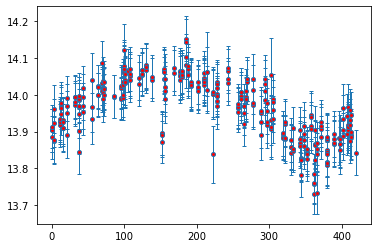

there is an error when generate_GP_simulation, class_label=8, id=3035086033045


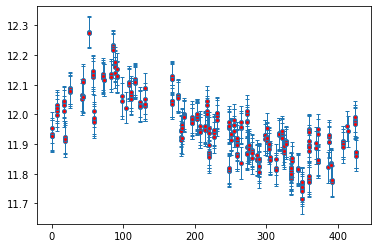

there is an error when generate_GP_simulation, class_label=8, id=3023111062937


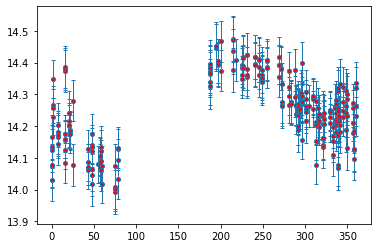

there is an error when generate_GP_simulation, class_label=8, id=3061022032466


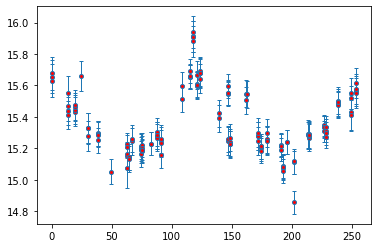

there is an error when generate_GP_simulation, class_label=8, id=3049095074484


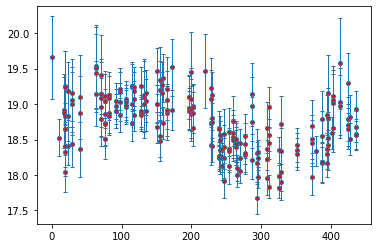

batch=1, count=768
augmenting
there is an error when generate_GP_simulation, class_label=8, id=3033124094992


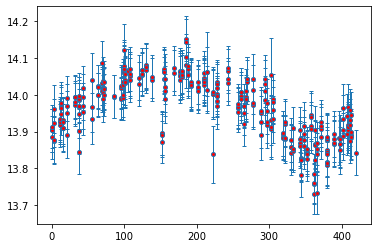

batch=2, count=1102
augmenting
batch=1, count=89
augmenting
batch=2, count=178
augmenting
batch=3, count=267
augmenting
batch=4, count=356
augmenting
batch=5, count=445
augmenting
batch=6, count=534
augmenting
batch=7, count=623
augmenting
batch=8, count=712
augmenting
batch=9, count=801
augmenting
batch=10, count=890
augmenting
batch=11, count=979
augmenting
batch=12, count=1068
augmenting
batch=13, count=1157
augmenting
batch=14, count=1246
augmenting
batch=15, count=1335
augmenting
batch=16, count=1424
augmenting
batch=17, count=1513
augmenting
batch=18, count=1602
augmenting
batch=19, count=1691
augmenting
batch=20, count=1780
augmenting
batch=21, count=1786
augmenting
batch=1, count=93
augmenting
batch=2, count=186
augmenting
batch=3, count=279
augmenting
batch=4, count=372
augmenting
batch=5, count=465
augmenting
batch=6, count=558
augmenting
batch=7, count=651
augmenting
batch=8, count=744
augmenting
batch=9, count=837
augmenting
batch=10, count=930
augmenting
batch=11, count=10

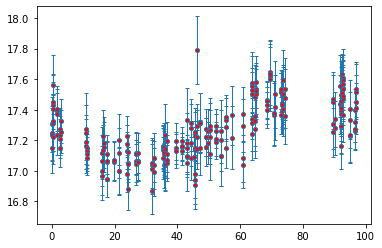

batch=1, count=92
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


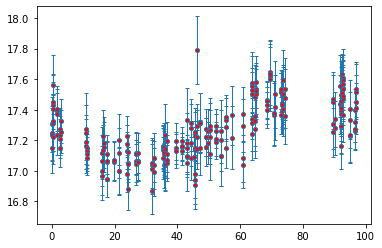

batch=2, count=184
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


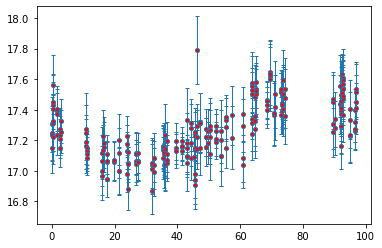

batch=3, count=276
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


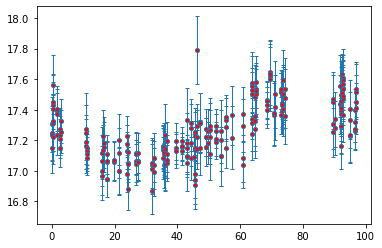

batch=4, count=368
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


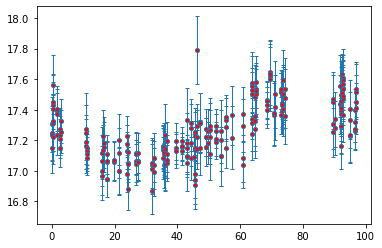

batch=5, count=460
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


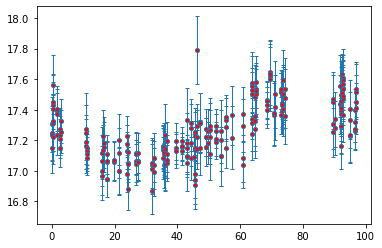

batch=6, count=552
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


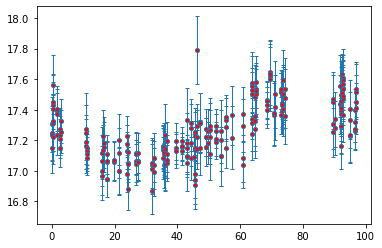

batch=7, count=644
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


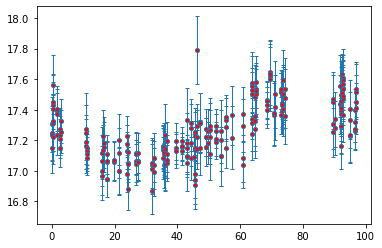

batch=8, count=736
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


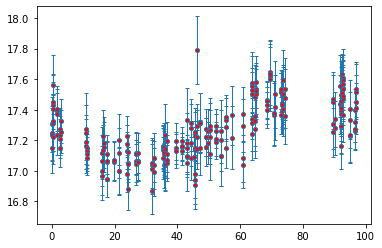

batch=9, count=828
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


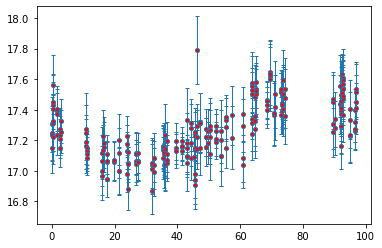

batch=10, count=920
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


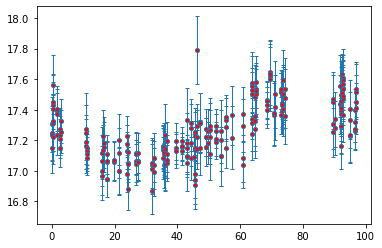

batch=11, count=1012
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


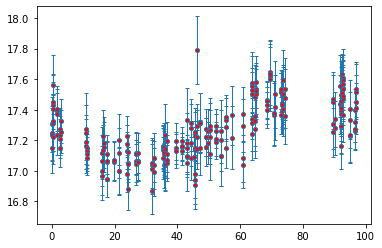

batch=12, count=1104
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


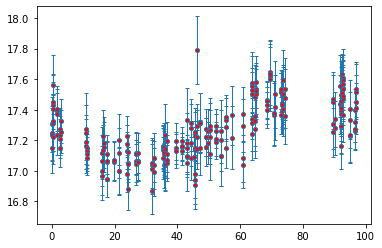

batch=13, count=1196
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


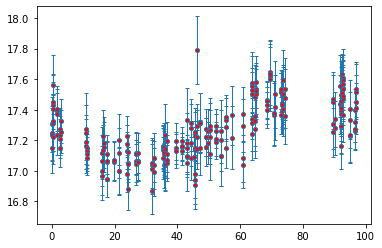

batch=14, count=1288
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


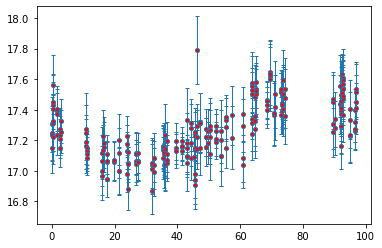

batch=15, count=1380
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


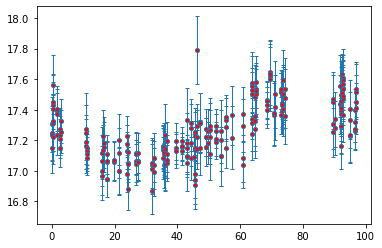

batch=16, count=1472
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


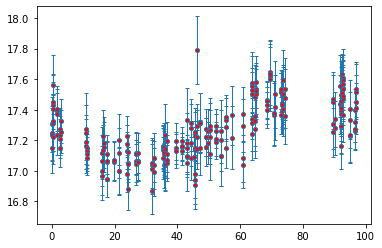

batch=17, count=1564
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


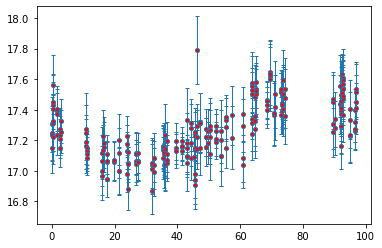

batch=18, count=1656
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


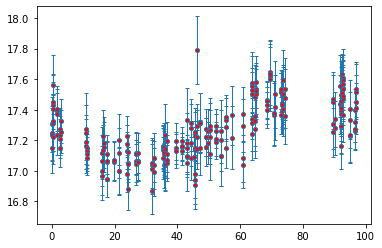

batch=19, count=1748
augmenting
batch=20, count=1782
augmenting
batch=1, count=302
augmenting
batch=2, count=604
augmenting
batch=3, count=906
augmenting
batch=4, count=1208
augmenting
batch=5, count=1510
augmenting
batch=6, count=1573
augmenting
batch=1, count=103
augmenting
batch=2, count=206
augmenting
batch=3, count=309
augmenting
batch=4, count=412
augmenting
batch=5, count=515
augmenting
batch=6, count=618
augmenting
batch=7, count=721
augmenting
batch=8, count=824
augmenting
batch=9, count=927
augmenting
batch=10, count=1030
augmenting
batch=11, count=1133
augmenting
batch=12, count=1236
augmenting
batch=13, count=1339
augmenting
batch=14, count=1442
augmenting
batch=15, count=1545
augmenting
batch=16, count=1648
augmenting
batch=17, count=1751
augmenting
batch=18, count=1772
augmenting
there is an error when generate_GP_simulation, class_label=8, id=3033124094992


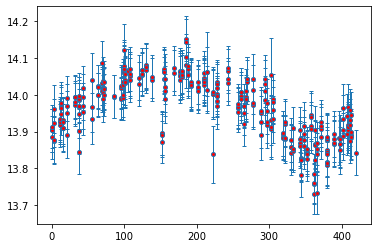

there is an error when generate_GP_simulation, class_label=8, id=3035086033045


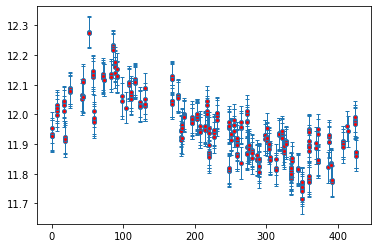

there is an error when generate_GP_simulation, class_label=8, id=3023111062937


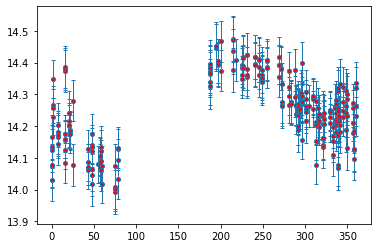

there is an error when generate_GP_simulation, class_label=8, id=3061022032466


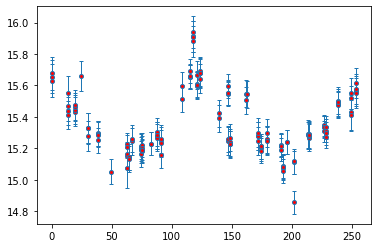

there is an error when generate_GP_simulation, class_label=8, id=3049095074484


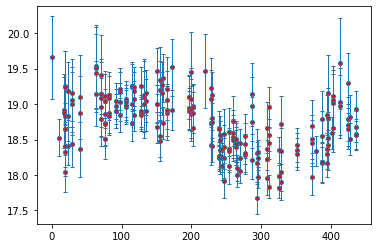

batch=1, count=768
augmenting
there is an error when generate_GP_simulation, class_label=8, id=3033124094992


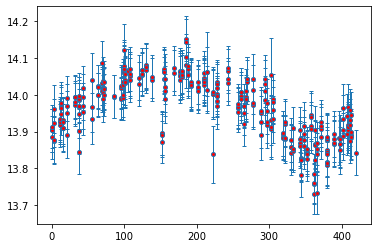

batch=2, count=1102
augmenting
batch=1, count=89
augmenting
batch=2, count=178
augmenting
batch=3, count=267
augmenting
batch=4, count=356
augmenting
batch=5, count=445
augmenting
batch=6, count=534
augmenting
batch=7, count=623
augmenting
batch=8, count=712
augmenting
batch=9, count=801
augmenting
batch=10, count=890
augmenting
batch=11, count=979
augmenting
batch=12, count=1068
augmenting
batch=13, count=1157
augmenting
batch=14, count=1246
augmenting
batch=15, count=1335
augmenting
batch=16, count=1424
augmenting
batch=17, count=1513
augmenting
batch=18, count=1602
augmenting
batch=19, count=1691
augmenting
batch=20, count=1780
augmenting
batch=21, count=1786
augmenting
batch=1, count=93
augmenting
batch=2, count=186
augmenting
batch=3, count=279
augmenting
batch=4, count=372
augmenting
batch=5, count=465
augmenting
batch=6, count=558
augmenting
batch=7, count=651
augmenting
batch=8, count=744
augmenting
batch=9, count=837
augmenting
batch=10, count=930
augmenting
batch=11, count=10

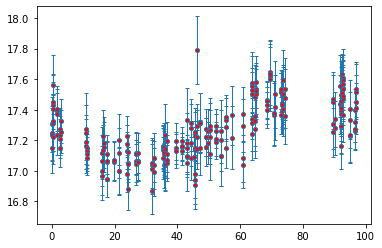

batch=1, count=92
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


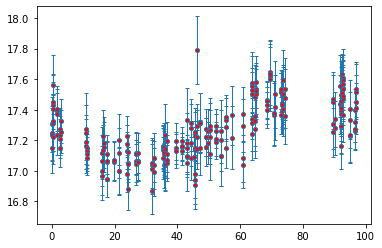

batch=2, count=184
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


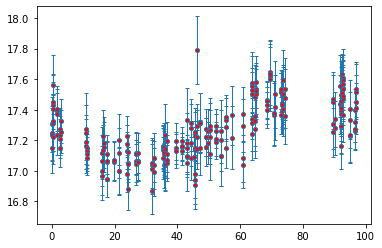

batch=3, count=276
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


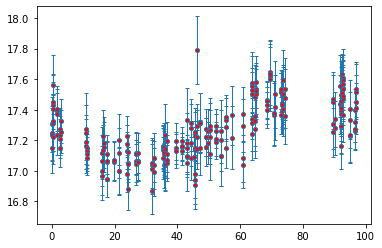

batch=4, count=368
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


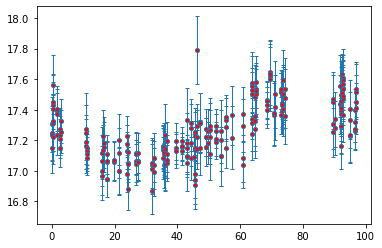

batch=5, count=460
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


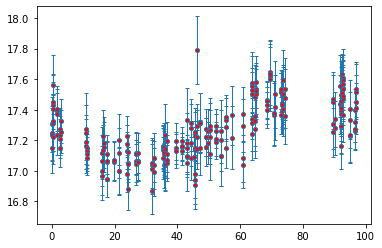

batch=6, count=552
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


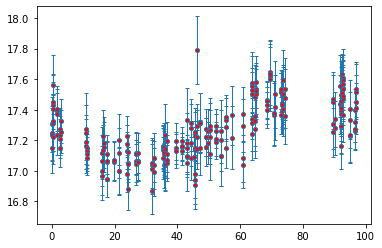

batch=7, count=644
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


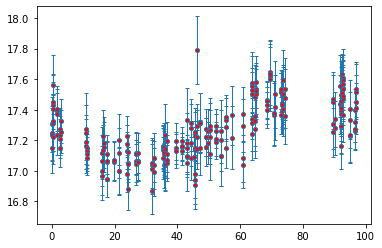

batch=8, count=736
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


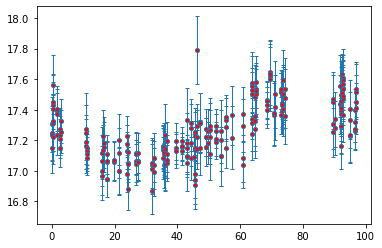

batch=9, count=828
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


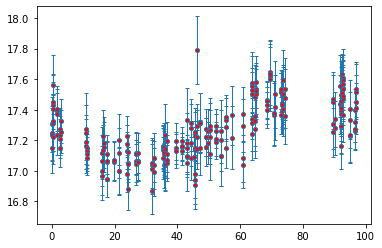

batch=10, count=920
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


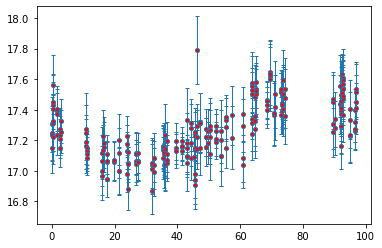

batch=11, count=1012
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


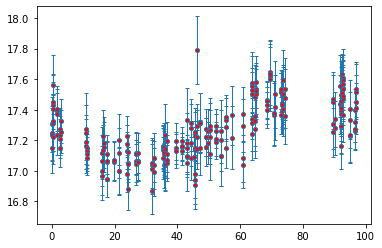

batch=12, count=1104
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


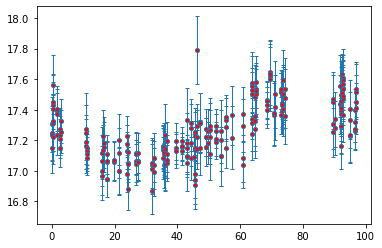

batch=13, count=1196
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


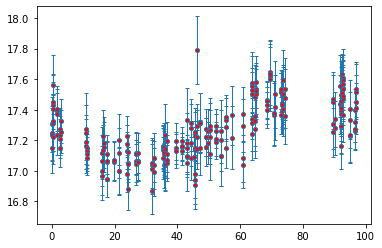

batch=14, count=1288
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


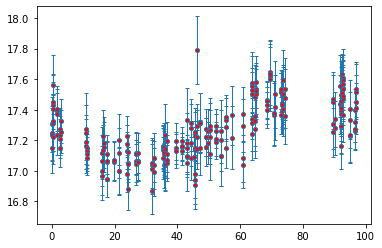

batch=15, count=1380
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


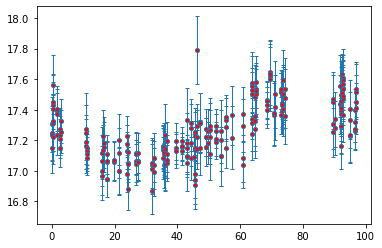

batch=16, count=1472
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


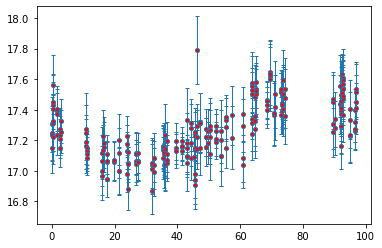

batch=17, count=1564
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


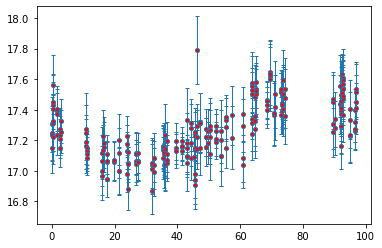

batch=18, count=1656
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


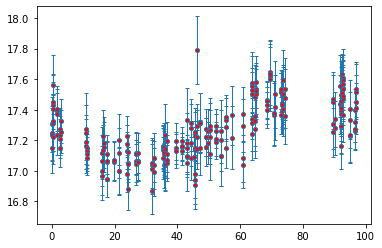

batch=19, count=1748
augmenting
batch=20, count=1782
augmenting
batch=1, count=302
augmenting
batch=2, count=604
augmenting
batch=3, count=906
augmenting
batch=4, count=1208
augmenting
batch=5, count=1510
augmenting
batch=6, count=1573
augmenting
batch=1, count=103
augmenting
batch=2, count=206
augmenting
batch=3, count=309
augmenting
batch=4, count=412
augmenting
batch=5, count=515
augmenting
batch=6, count=618
augmenting
batch=7, count=721
augmenting
batch=8, count=824
augmenting
batch=9, count=927
augmenting
batch=10, count=1030
augmenting
batch=11, count=1133
augmenting
batch=12, count=1236
augmenting
batch=13, count=1339
augmenting
batch=14, count=1442
augmenting
batch=15, count=1545
augmenting
batch=16, count=1648
augmenting
batch=17, count=1751
augmenting
batch=18, count=1772
augmenting
there is an error when generate_GP_simulation, class_label=8, id=3033124094992


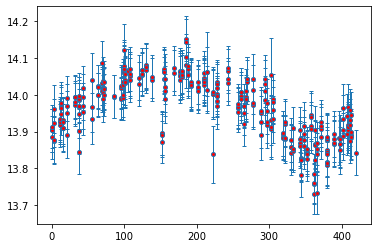

there is an error when generate_GP_simulation, class_label=8, id=3035086033045


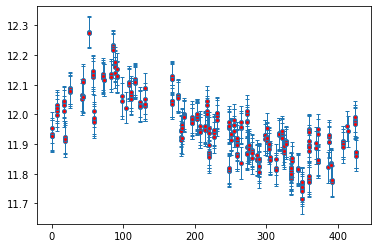

there is an error when generate_GP_simulation, class_label=8, id=3023111062937


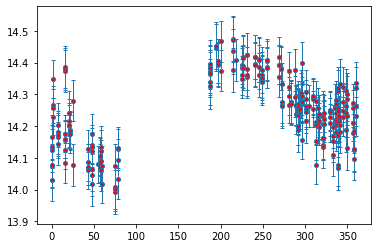

there is an error when generate_GP_simulation, class_label=8, id=3061022032466


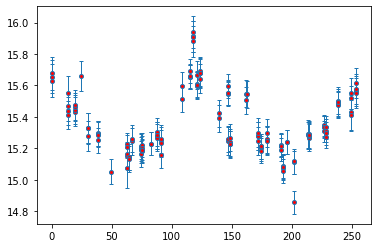

there is an error when generate_GP_simulation, class_label=8, id=3049095074484


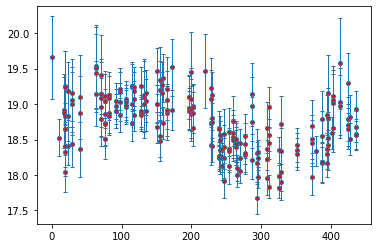

batch=1, count=768
augmenting
there is an error when generate_GP_simulation, class_label=8, id=3033124094992


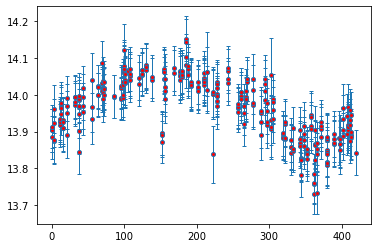

batch=2, count=1102
augmenting
batch=1, count=89
augmenting
batch=2, count=178
augmenting
batch=3, count=267
augmenting
batch=4, count=356
augmenting
batch=5, count=445
augmenting
batch=6, count=534
augmenting
batch=7, count=623
augmenting
batch=8, count=712
augmenting
batch=9, count=801
augmenting
batch=10, count=890
augmenting
batch=11, count=979
augmenting
batch=12, count=1068
augmenting
batch=13, count=1157
augmenting
batch=14, count=1246
augmenting
batch=15, count=1335
augmenting
batch=16, count=1424
augmenting
batch=17, count=1513
augmenting
batch=18, count=1602
augmenting
batch=19, count=1691
augmenting
batch=20, count=1780
augmenting
batch=21, count=1786
augmenting
batch=1, count=93
augmenting
batch=2, count=186
augmenting
batch=3, count=279
augmenting
batch=4, count=372
augmenting
batch=5, count=465
augmenting
batch=6, count=558
augmenting
batch=7, count=651
augmenting
batch=8, count=744
augmenting
batch=9, count=837
augmenting
batch=10, count=930
augmenting
batch=11, count=10

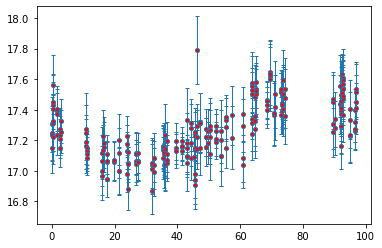

batch=1, count=92
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


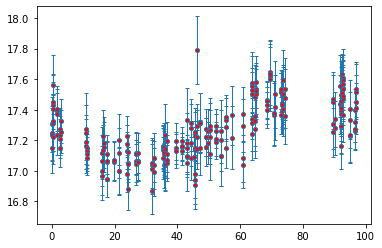

batch=2, count=184
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


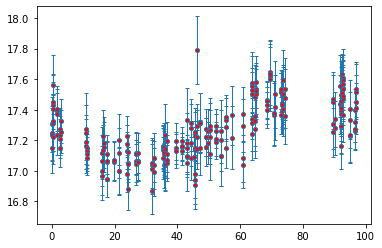

batch=3, count=276
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


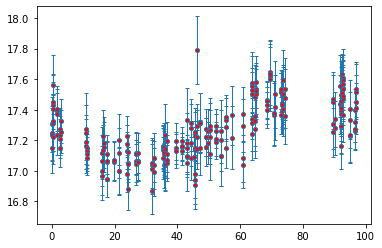

batch=4, count=368
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


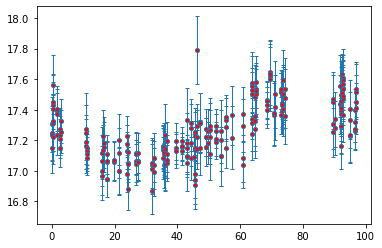

batch=5, count=460
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


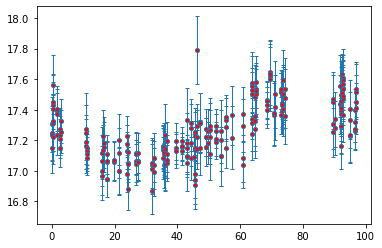

batch=6, count=552
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


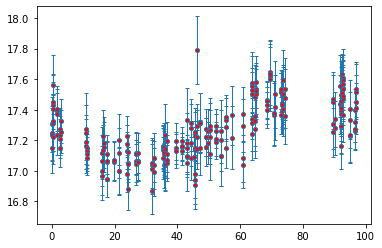

batch=7, count=644
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


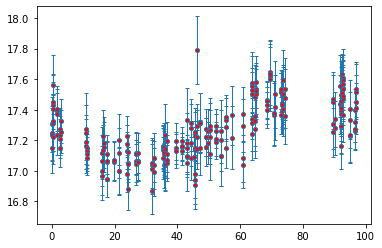

batch=8, count=736
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


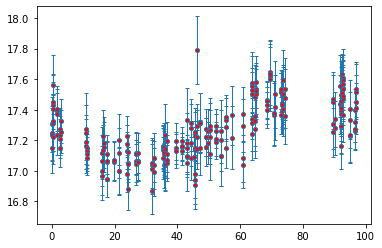

batch=9, count=828
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


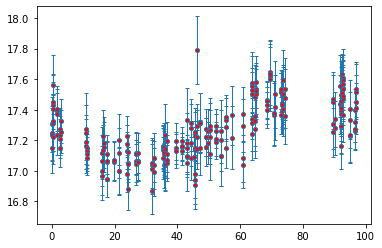

batch=10, count=920
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


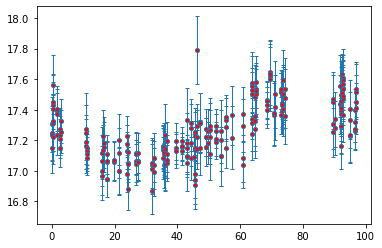

batch=11, count=1012
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


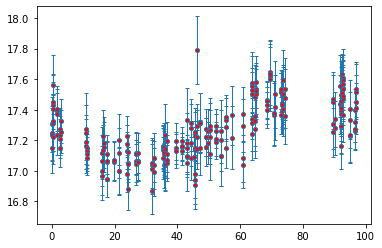

batch=12, count=1104
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


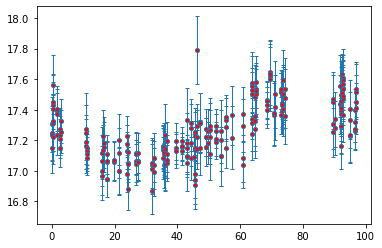

batch=13, count=1196
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


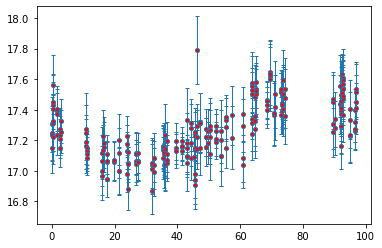

batch=14, count=1288
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


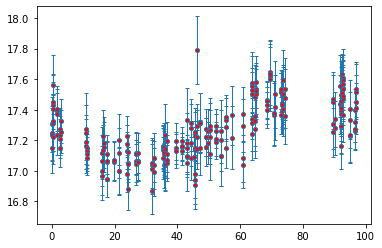

batch=15, count=1380
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


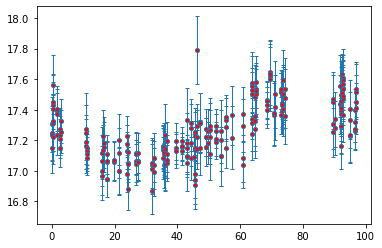

batch=16, count=1472
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


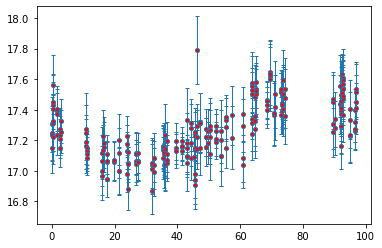

batch=17, count=1564
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


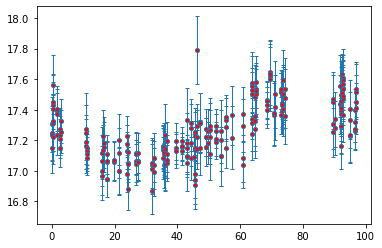

batch=18, count=1656
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


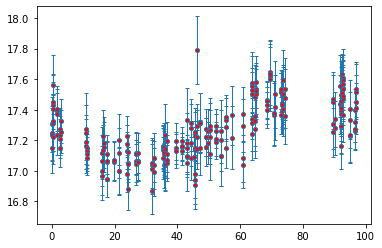

batch=19, count=1748
augmenting
batch=20, count=1782
augmenting
batch=1, count=302
augmenting
batch=2, count=604
augmenting
batch=3, count=906
augmenting
batch=4, count=1208
augmenting
batch=5, count=1510
augmenting
batch=6, count=1573
augmenting
batch=1, count=103
augmenting
batch=2, count=206
augmenting
batch=3, count=309
augmenting
batch=4, count=412
augmenting
batch=5, count=515
augmenting
batch=6, count=618
augmenting
batch=7, count=721
augmenting
batch=8, count=824
augmenting
batch=9, count=927
augmenting
batch=10, count=1030
augmenting
batch=11, count=1133
augmenting
batch=12, count=1236
augmenting
batch=13, count=1339
augmenting
batch=14, count=1442
augmenting
batch=15, count=1545
augmenting
batch=16, count=1648
augmenting
batch=17, count=1751
augmenting
batch=18, count=1772
augmenting
there is an error when generate_GP_simulation, class_label=8, id=3033124094992


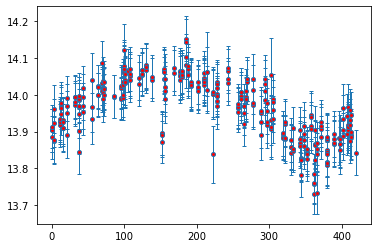

there is an error when generate_GP_simulation, class_label=8, id=3035086033045


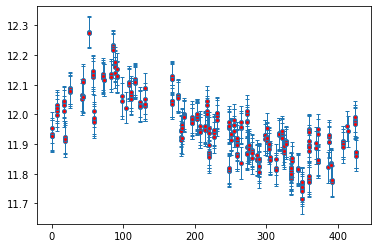

there is an error when generate_GP_simulation, class_label=8, id=3023111062937


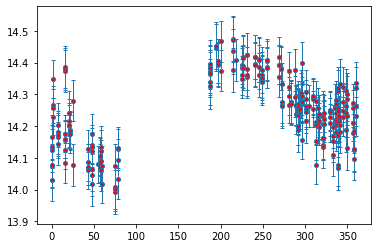

there is an error when generate_GP_simulation, class_label=8, id=3061022032466


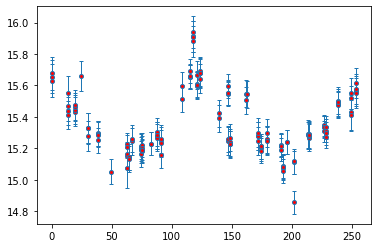

there is an error when generate_GP_simulation, class_label=8, id=3049095074484


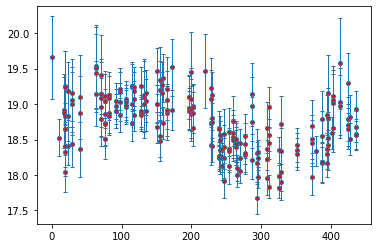

batch=1, count=768
augmenting
there is an error when generate_GP_simulation, class_label=8, id=3033124094992


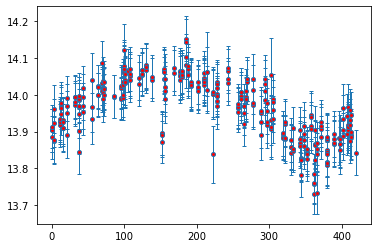

batch=2, count=1102
augmenting
batch=1, count=89
augmenting
batch=2, count=178
augmenting
batch=3, count=267
augmenting
batch=4, count=356
augmenting
batch=5, count=445
augmenting
batch=6, count=534
augmenting
batch=7, count=623
augmenting
batch=8, count=712
augmenting
batch=9, count=801
augmenting
batch=10, count=890
augmenting
batch=11, count=979
augmenting
batch=12, count=1068
augmenting
batch=13, count=1157
augmenting
batch=14, count=1246
augmenting
batch=15, count=1335
augmenting
batch=16, count=1424
augmenting
batch=17, count=1513
augmenting
batch=18, count=1602
augmenting
batch=19, count=1691
augmenting
batch=20, count=1780
augmenting
batch=21, count=1786
augmenting
batch=1, count=93
augmenting
batch=2, count=186
augmenting
batch=3, count=279
augmenting
batch=4, count=372
augmenting
batch=5, count=465
augmenting
batch=6, count=558
augmenting
batch=7, count=651
augmenting
batch=8, count=744
augmenting
batch=9, count=837
augmenting
batch=10, count=930
augmenting
batch=11, count=10

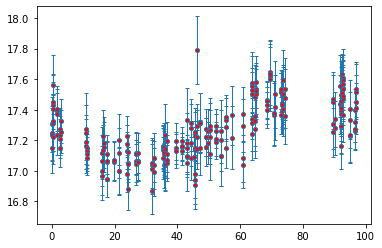

batch=1, count=92
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


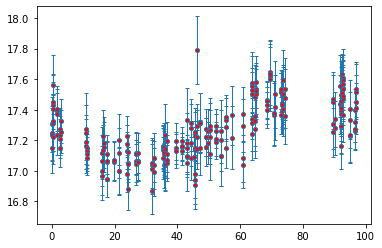

batch=2, count=184
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


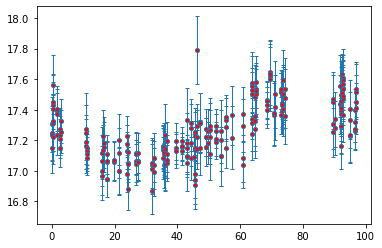

batch=3, count=276
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


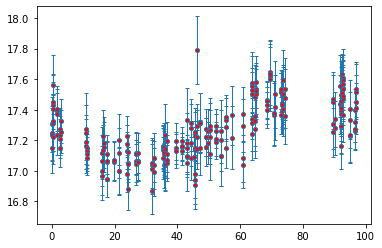

batch=4, count=368
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


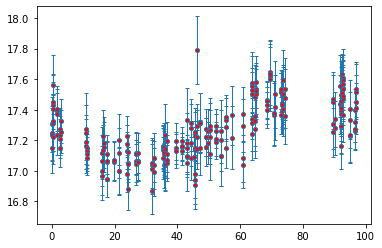

batch=5, count=460
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


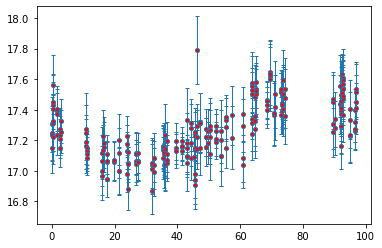

batch=6, count=552
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


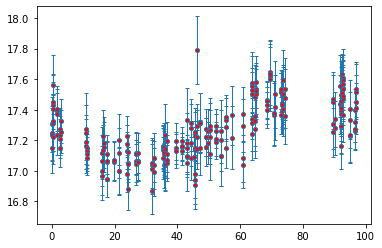

batch=7, count=644
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


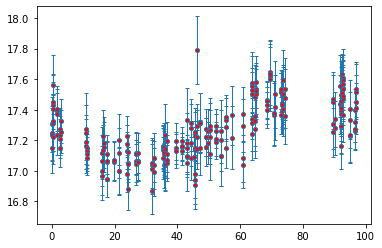

batch=8, count=736
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


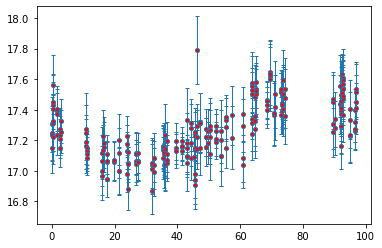

batch=9, count=828
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


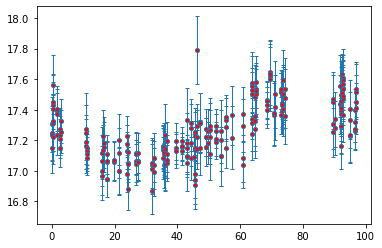

batch=10, count=920
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


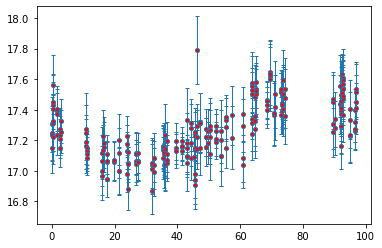

batch=11, count=1012
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


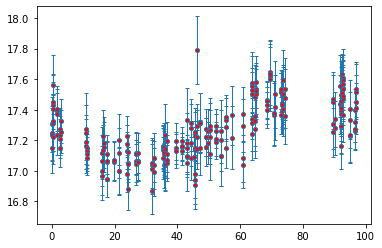

batch=12, count=1104
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


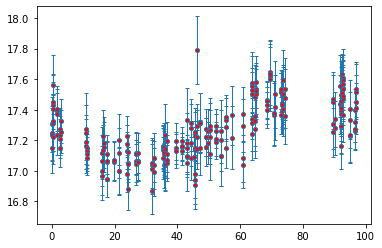

batch=13, count=1196
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


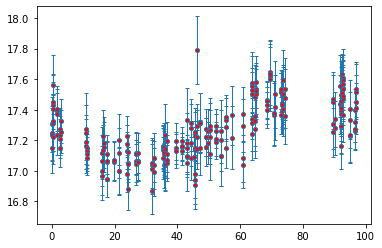

batch=14, count=1288
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


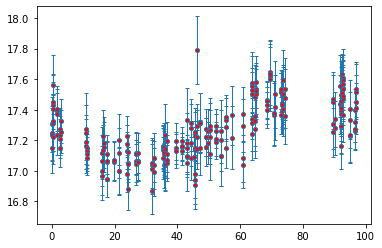

batch=15, count=1380
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


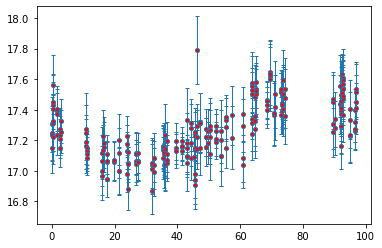

batch=16, count=1472
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


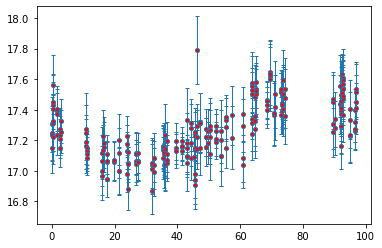

batch=17, count=1564
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


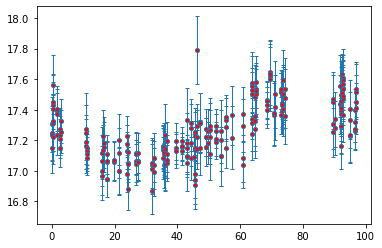

batch=18, count=1656
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


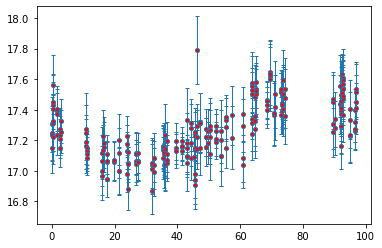

batch=19, count=1748
augmenting
batch=20, count=1782
augmenting
batch=1, count=302
augmenting
batch=2, count=604
augmenting
batch=3, count=906
augmenting
batch=4, count=1208
augmenting
batch=5, count=1510
augmenting
batch=6, count=1573
augmenting
batch=1, count=103
augmenting
batch=2, count=206
augmenting
batch=3, count=309
augmenting
batch=4, count=412
augmenting
batch=5, count=515
augmenting
batch=6, count=618
augmenting
batch=7, count=721
augmenting
batch=8, count=824
augmenting
batch=9, count=927
augmenting
batch=10, count=1030
augmenting
batch=11, count=1133
augmenting
batch=12, count=1236
augmenting
batch=13, count=1339
augmenting
batch=14, count=1442
augmenting
batch=15, count=1545
augmenting
batch=16, count=1648
augmenting
batch=17, count=1751
augmenting
batch=18, count=1772
augmenting
there is an error when generate_GP_simulation, class_label=8, id=3033124094992


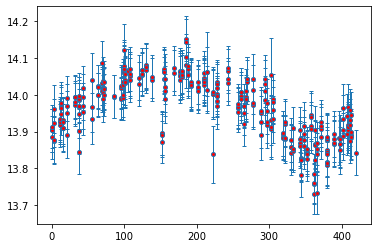

there is an error when generate_GP_simulation, class_label=8, id=3035086033045


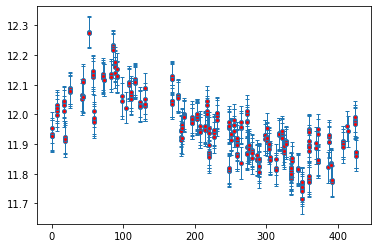

there is an error when generate_GP_simulation, class_label=8, id=3023111062937


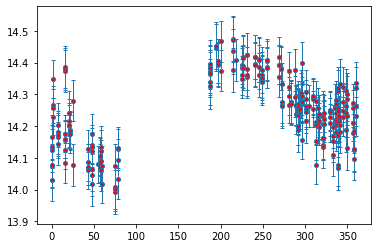

there is an error when generate_GP_simulation, class_label=8, id=3061022032466


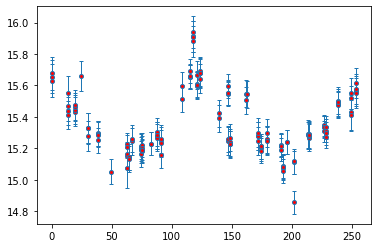

there is an error when generate_GP_simulation, class_label=8, id=3049095074484


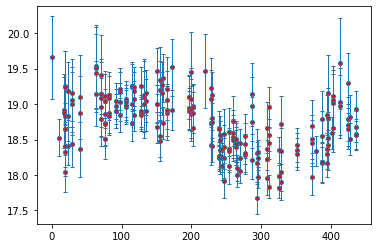

batch=1, count=768
augmenting
there is an error when generate_GP_simulation, class_label=8, id=3033124094992


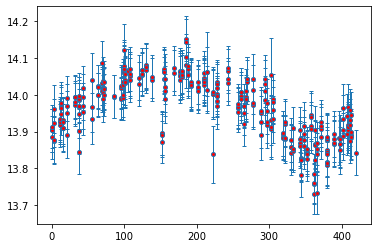

batch=2, count=1102
augmenting
batch=1, count=89
augmenting
batch=2, count=178
augmenting
batch=3, count=267
augmenting
batch=4, count=356
augmenting
batch=5, count=445
augmenting
batch=6, count=534
augmenting
batch=7, count=623
augmenting
batch=8, count=712
augmenting
batch=9, count=801
augmenting
batch=10, count=890
augmenting
batch=11, count=979
augmenting
batch=12, count=1068
augmenting
batch=13, count=1157
augmenting
batch=14, count=1246
augmenting
batch=15, count=1335
augmenting
batch=16, count=1424
augmenting
batch=17, count=1513
augmenting
batch=18, count=1602
augmenting
batch=19, count=1691
augmenting
batch=20, count=1780
augmenting
batch=21, count=1786
augmenting
batch=1, count=93
augmenting
batch=2, count=186
augmenting
batch=3, count=279
augmenting
batch=4, count=372
augmenting
batch=5, count=465
augmenting
batch=6, count=558
augmenting
batch=7, count=651
augmenting
batch=8, count=744
augmenting
batch=9, count=837
augmenting
batch=10, count=930
augmenting
batch=11, count=10

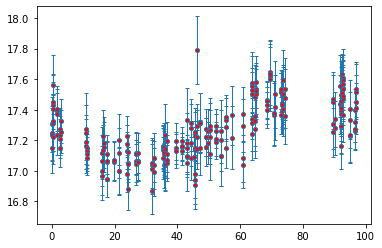

batch=1, count=92
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


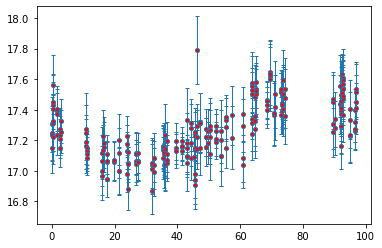

batch=2, count=184
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


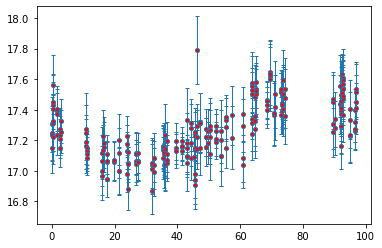

batch=3, count=276
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


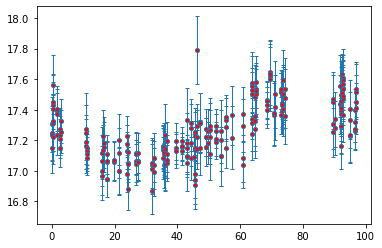

batch=4, count=368
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


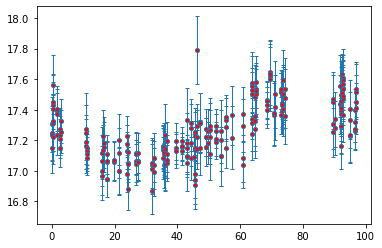

batch=5, count=460
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


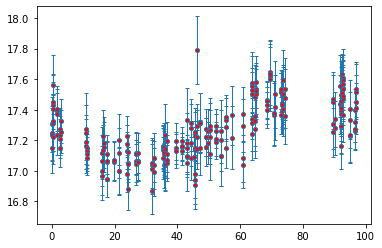

batch=6, count=552
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


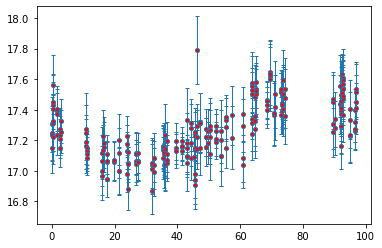

batch=7, count=644
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


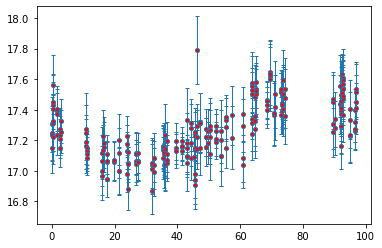

batch=8, count=736
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


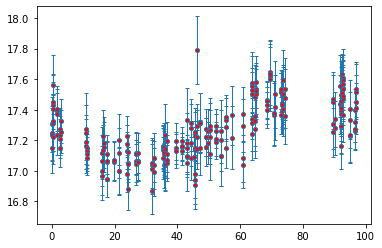

batch=9, count=828
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


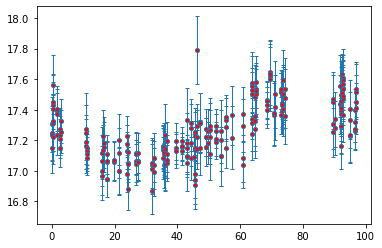

batch=10, count=920
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


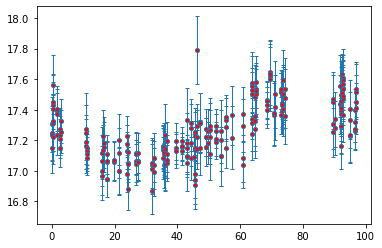

batch=11, count=1012
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


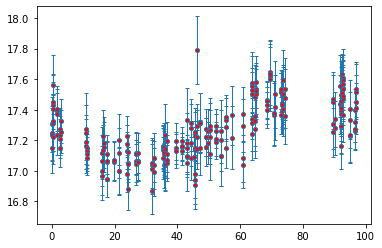

batch=12, count=1104
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


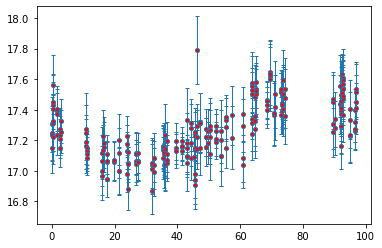

batch=13, count=1196
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


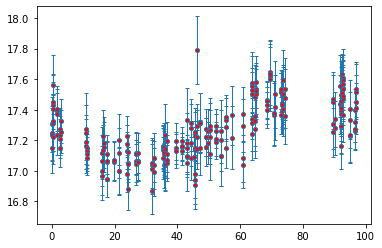

batch=14, count=1288
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


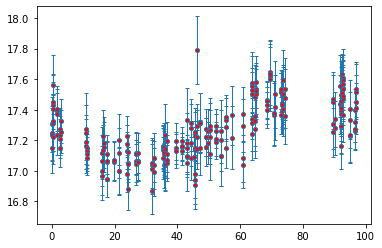

batch=15, count=1380
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


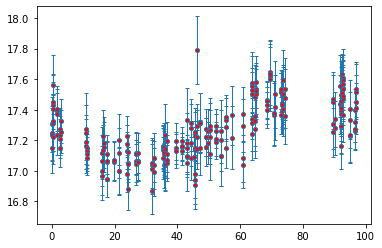

batch=16, count=1472
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


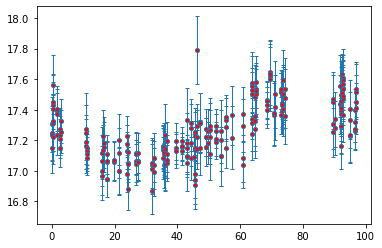

batch=17, count=1564
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


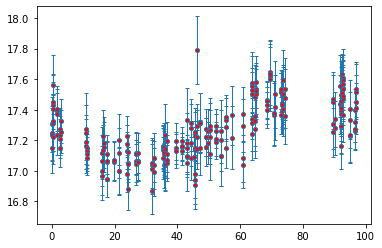

batch=18, count=1656
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


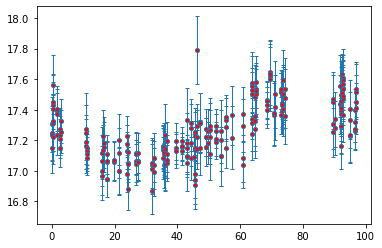

batch=19, count=1748
augmenting
batch=20, count=1782
augmenting
batch=1, count=302
augmenting
batch=2, count=604
augmenting
batch=3, count=906
augmenting
batch=4, count=1208
augmenting
batch=5, count=1510
augmenting
batch=6, count=1573
augmenting
batch=1, count=103
augmenting
batch=2, count=206
augmenting
batch=3, count=309
augmenting
batch=4, count=412
augmenting
batch=5, count=515
augmenting
batch=6, count=618
augmenting
batch=7, count=721
augmenting
batch=8, count=824
augmenting
batch=9, count=927
augmenting
batch=10, count=1030
augmenting
batch=11, count=1133
augmenting
batch=12, count=1236
augmenting
batch=13, count=1339
augmenting
batch=14, count=1442
augmenting
batch=15, count=1545
augmenting
batch=16, count=1648
augmenting
batch=17, count=1751
augmenting
batch=18, count=1772
augmenting
there is an error when generate_GP_simulation, class_label=8, id=3033124094992


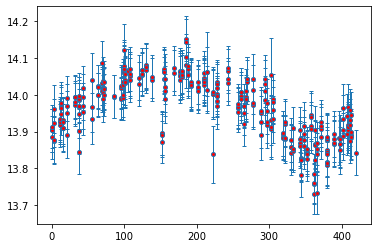

there is an error when generate_GP_simulation, class_label=8, id=3035086033045


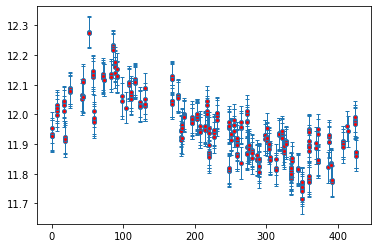

there is an error when generate_GP_simulation, class_label=8, id=3023111062937


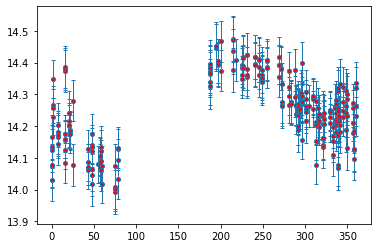

there is an error when generate_GP_simulation, class_label=8, id=3061022032466


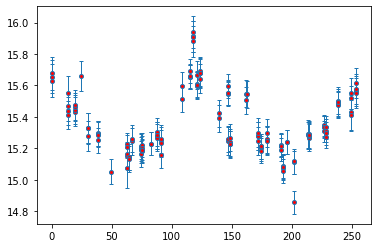

there is an error when generate_GP_simulation, class_label=8, id=3049095074484


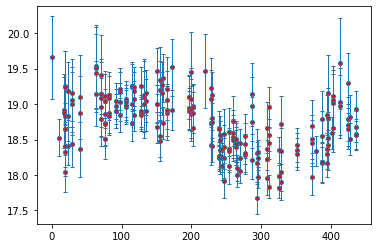

batch=1, count=768
augmenting
there is an error when generate_GP_simulation, class_label=8, id=3033124094992


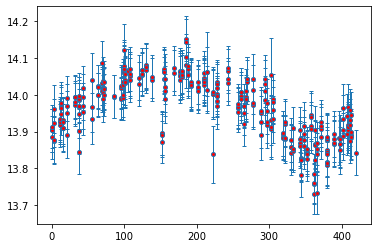

batch=2, count=1102
augmenting
batch=1, count=89
augmenting
batch=2, count=178
augmenting
batch=3, count=267
augmenting
batch=4, count=356
augmenting
batch=5, count=445
augmenting
batch=6, count=534
augmenting
batch=7, count=623
augmenting
batch=8, count=712
augmenting
batch=9, count=801
augmenting
batch=10, count=890
augmenting
batch=11, count=979
augmenting
batch=12, count=1068
augmenting
batch=13, count=1157
augmenting
batch=14, count=1246
augmenting
batch=15, count=1335
augmenting
batch=16, count=1424
augmenting
batch=17, count=1513
augmenting
batch=18, count=1602
augmenting
batch=19, count=1691
augmenting
batch=20, count=1780
augmenting
batch=21, count=1786
augmenting
batch=1, count=93
augmenting
batch=2, count=186
augmenting
batch=3, count=279
augmenting
batch=4, count=372
augmenting
batch=5, count=465
augmenting
batch=6, count=558
augmenting
batch=7, count=651
augmenting
batch=8, count=744
augmenting
batch=9, count=837
augmenting
batch=10, count=930
augmenting
batch=11, count=10

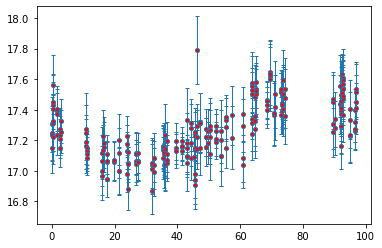

batch=1, count=92
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


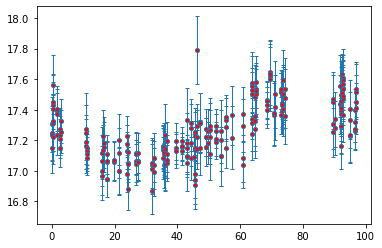

batch=2, count=184
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


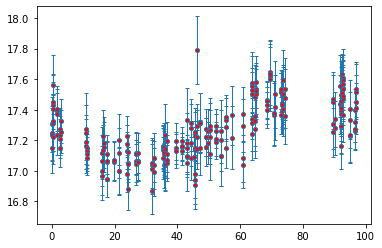

batch=3, count=276
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


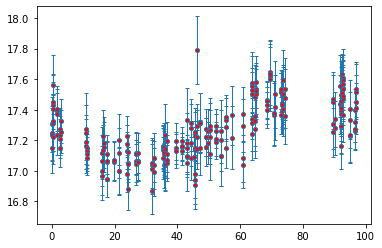

batch=4, count=368
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


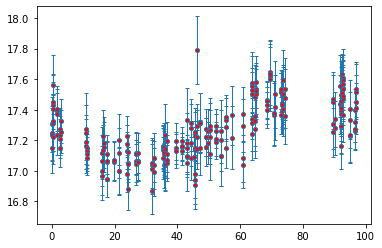

batch=5, count=460
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


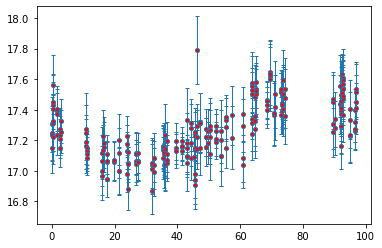

batch=6, count=552
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


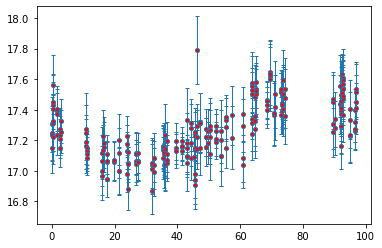

batch=7, count=644
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


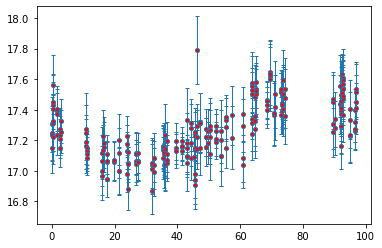

batch=8, count=736
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


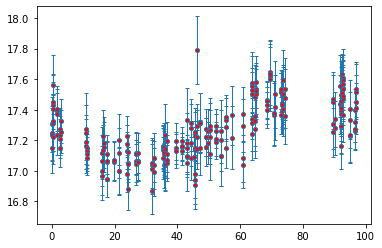

batch=9, count=828
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


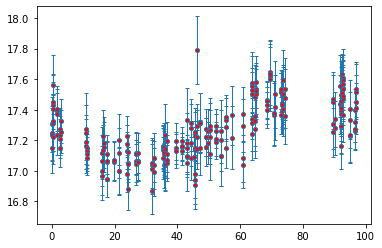

batch=10, count=920
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


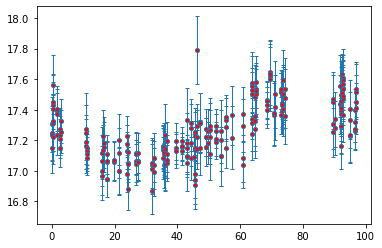

batch=11, count=1012
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


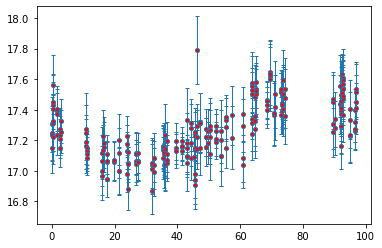

batch=12, count=1104
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


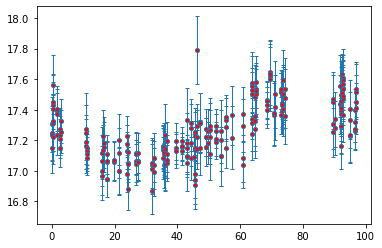

batch=13, count=1196
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


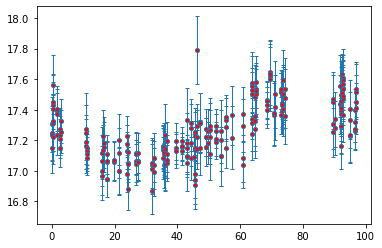

batch=14, count=1288
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


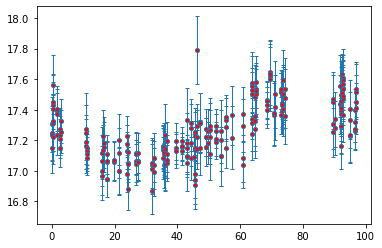

batch=15, count=1380
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


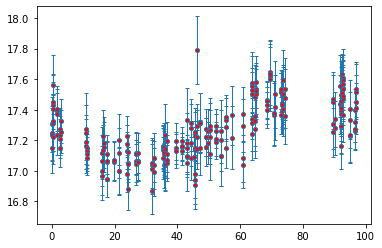

batch=16, count=1472
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


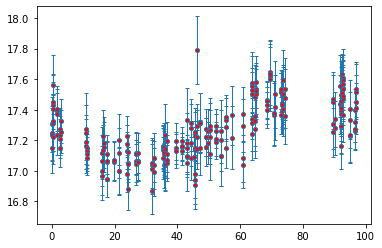

batch=17, count=1564
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


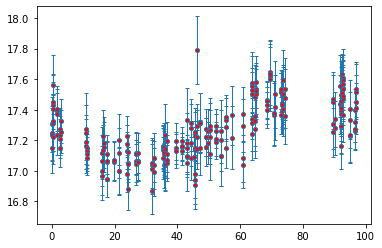

batch=18, count=1656
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


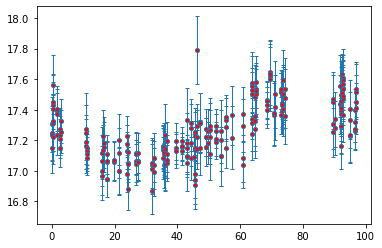

batch=19, count=1748
augmenting
batch=20, count=1782
augmenting
batch=1, count=302
augmenting
batch=2, count=604
augmenting
batch=3, count=906
augmenting
batch=4, count=1208
augmenting
batch=5, count=1510
augmenting
batch=6, count=1573
augmenting
batch=1, count=103
augmenting
batch=2, count=206
augmenting
batch=3, count=309
augmenting
batch=4, count=412
augmenting
batch=5, count=515
augmenting
batch=6, count=618
augmenting
batch=7, count=721
augmenting
batch=8, count=824
augmenting
batch=9, count=927
augmenting
batch=10, count=1030
augmenting
batch=11, count=1133
augmenting
batch=12, count=1236
augmenting
batch=13, count=1339
augmenting
batch=14, count=1442
augmenting
batch=15, count=1545
augmenting
batch=16, count=1648
augmenting
batch=17, count=1751
augmenting
batch=18, count=1772
augmenting
there is an error when generate_GP_simulation, class_label=8, id=3033124094992


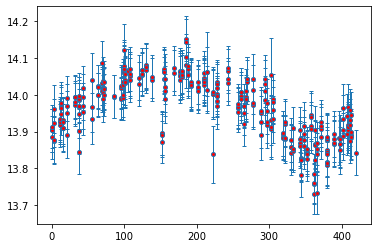

there is an error when generate_GP_simulation, class_label=8, id=3035086033045


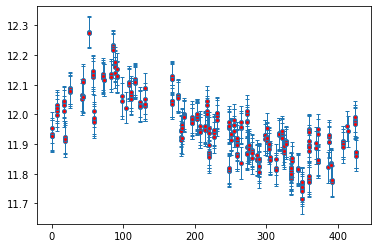

there is an error when generate_GP_simulation, class_label=8, id=3023111062937


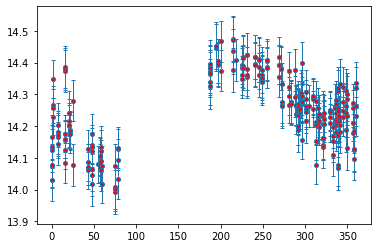

there is an error when generate_GP_simulation, class_label=8, id=3061022032466


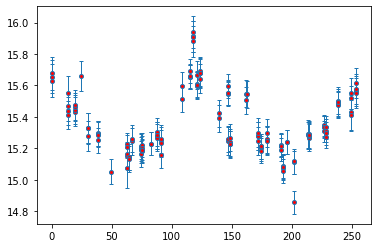

there is an error when generate_GP_simulation, class_label=8, id=3049095074484


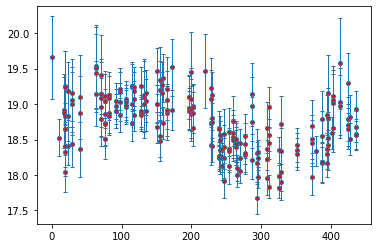

batch=1, count=768
augmenting
there is an error when generate_GP_simulation, class_label=8, id=3033124094992


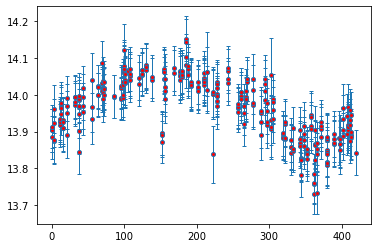

batch=2, count=1102
augmenting
batch=1, count=89
augmenting
batch=2, count=178
augmenting
batch=3, count=267
augmenting
batch=4, count=356
augmenting
batch=5, count=445
augmenting
batch=6, count=534
augmenting
batch=7, count=623
augmenting
batch=8, count=712
augmenting
batch=9, count=801
augmenting
batch=10, count=890
augmenting
batch=11, count=979
augmenting
batch=12, count=1068
augmenting
batch=13, count=1157
augmenting
batch=14, count=1246
augmenting
batch=15, count=1335
augmenting
batch=16, count=1424
augmenting
batch=17, count=1513
augmenting
batch=18, count=1602
augmenting
batch=19, count=1691
augmenting
batch=20, count=1780
augmenting
batch=21, count=1786
augmenting
batch=1, count=93
augmenting
batch=2, count=186
augmenting
batch=3, count=279
augmenting
batch=4, count=372
augmenting
batch=5, count=465
augmenting
batch=6, count=558
augmenting
batch=7, count=651
augmenting
batch=8, count=744
augmenting
batch=9, count=837
augmenting
batch=10, count=930
augmenting
batch=11, count=10

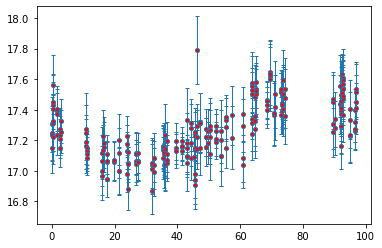

batch=1, count=92
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


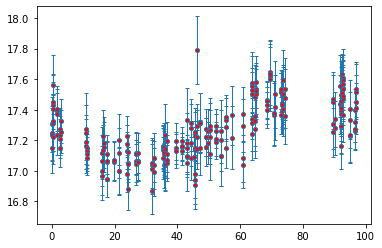

batch=2, count=184
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


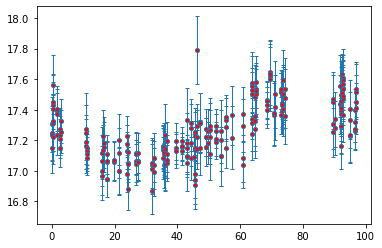

batch=3, count=276
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


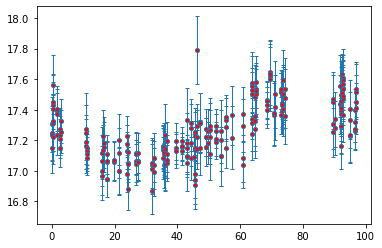

batch=4, count=368
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


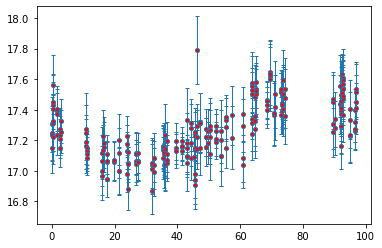

batch=5, count=460
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


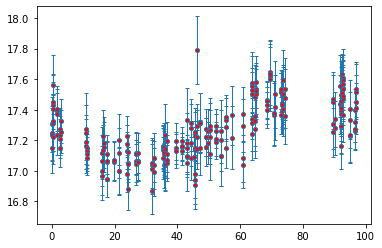

batch=6, count=552
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


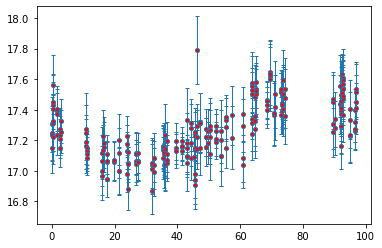

batch=7, count=644
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


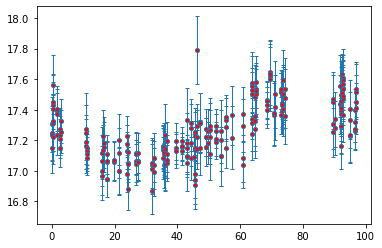

batch=8, count=736
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


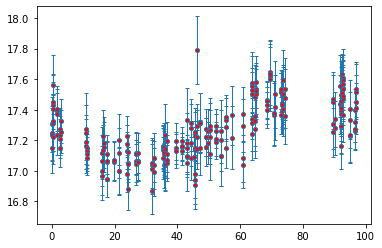

batch=9, count=828
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


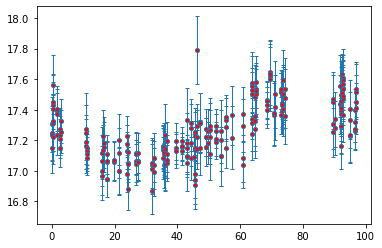

batch=10, count=920
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


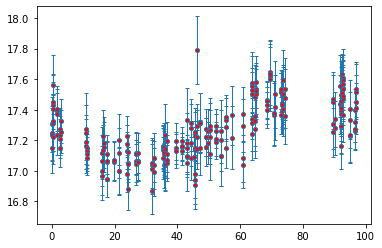

batch=11, count=1012
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


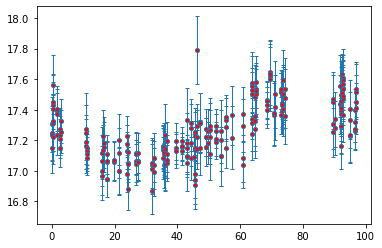

batch=12, count=1104
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


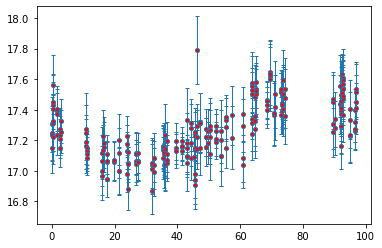

batch=13, count=1196
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


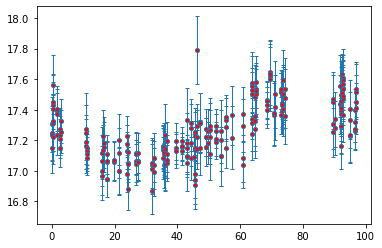

batch=14, count=1288
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


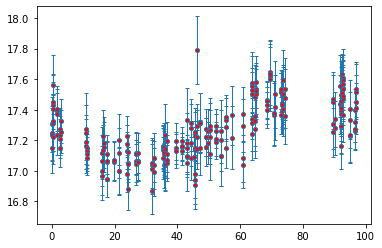

batch=15, count=1380
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


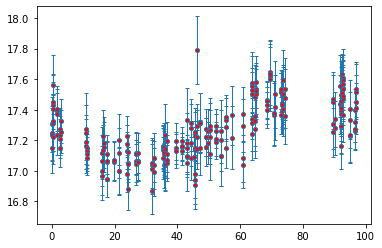

batch=16, count=1472
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


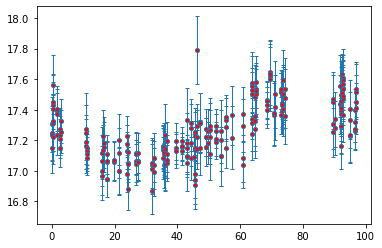

batch=17, count=1564
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


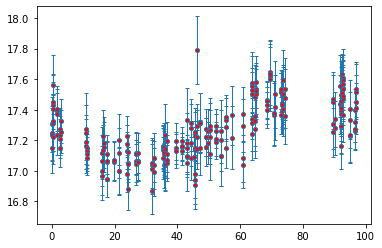

batch=18, count=1656
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


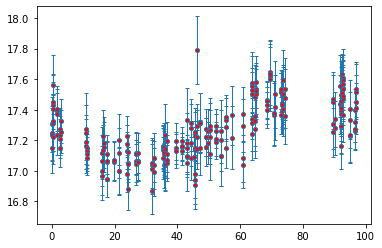

batch=19, count=1748
augmenting
batch=20, count=1782
augmenting
batch=1, count=302
augmenting
batch=2, count=604
augmenting
batch=3, count=906
augmenting
batch=4, count=1208
augmenting
batch=5, count=1510
augmenting
batch=6, count=1573
augmenting
batch=1, count=103
augmenting
batch=2, count=206
augmenting
batch=3, count=309
augmenting
batch=4, count=412
augmenting
batch=5, count=515
augmenting
batch=6, count=618
augmenting
batch=7, count=721
augmenting
batch=8, count=824
augmenting
batch=9, count=927
augmenting
batch=10, count=1030
augmenting
batch=11, count=1133
augmenting
batch=12, count=1236
augmenting
batch=13, count=1339
augmenting
batch=14, count=1442
augmenting
batch=15, count=1545
augmenting
batch=16, count=1648
augmenting
batch=17, count=1751
augmenting
batch=18, count=1772
augmenting
there is an error when generate_GP_simulation, class_label=8, id=3033124094992


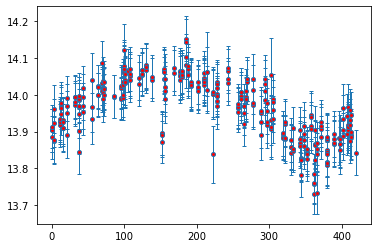

there is an error when generate_GP_simulation, class_label=8, id=3035086033045


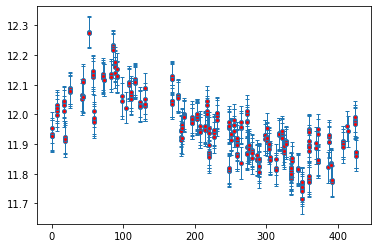

there is an error when generate_GP_simulation, class_label=8, id=3023111062937


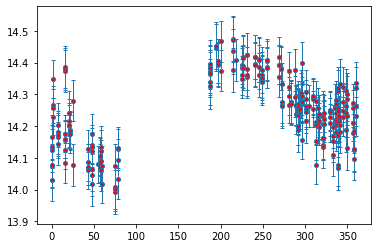

there is an error when generate_GP_simulation, class_label=8, id=3061022032466


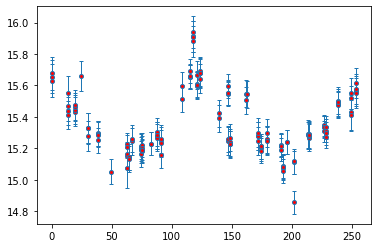

there is an error when generate_GP_simulation, class_label=8, id=3049095074484


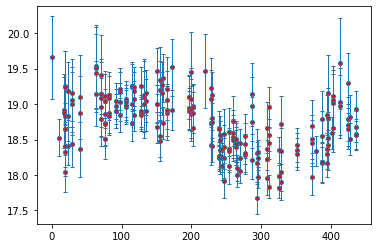

batch=1, count=768
augmenting
there is an error when generate_GP_simulation, class_label=8, id=3033124094992


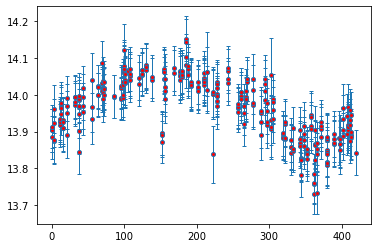

batch=2, count=1102
augmenting
batch=1, count=89
augmenting
batch=2, count=178
augmenting
batch=3, count=267
augmenting
batch=4, count=356
augmenting
batch=5, count=445
augmenting
batch=6, count=534
augmenting
batch=7, count=623
augmenting
batch=8, count=712
augmenting
batch=9, count=801
augmenting
batch=10, count=890
augmenting
batch=11, count=979
augmenting
batch=12, count=1068
augmenting
batch=13, count=1157
augmenting
batch=14, count=1246
augmenting
batch=15, count=1335
augmenting
batch=16, count=1424
augmenting
batch=17, count=1513
augmenting
batch=18, count=1602
augmenting
batch=19, count=1691
augmenting
batch=20, count=1780
augmenting
batch=21, count=1786
augmenting
batch=1, count=93
augmenting
batch=2, count=186
augmenting
batch=3, count=279
augmenting
batch=4, count=372
augmenting
batch=5, count=465
augmenting
batch=6, count=558
augmenting
batch=7, count=651
augmenting
batch=8, count=744
augmenting
batch=9, count=837
augmenting
batch=10, count=930
augmenting
batch=11, count=10

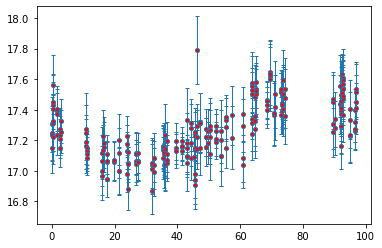

batch=1, count=92
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


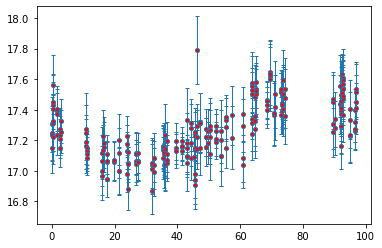

batch=2, count=184
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


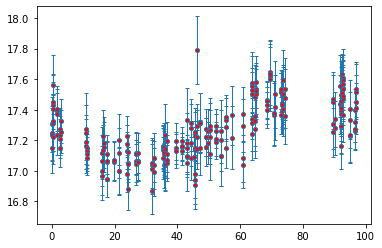

batch=3, count=276
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


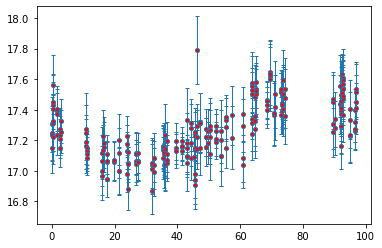

batch=4, count=368
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


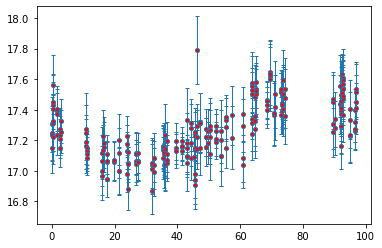

batch=5, count=460
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


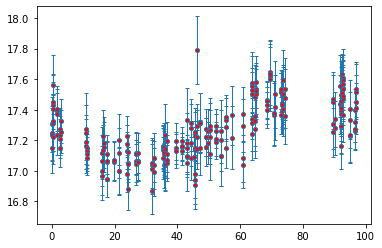

batch=6, count=552
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


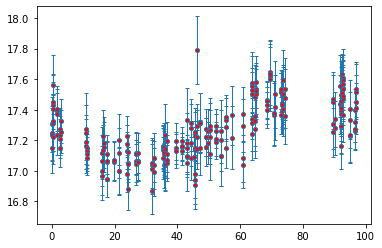

batch=7, count=644
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


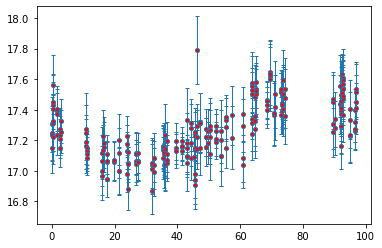

batch=8, count=736
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


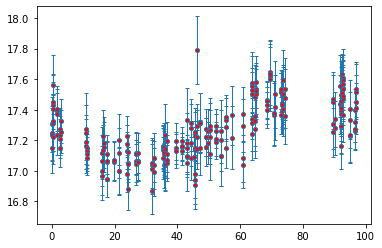

batch=9, count=828
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


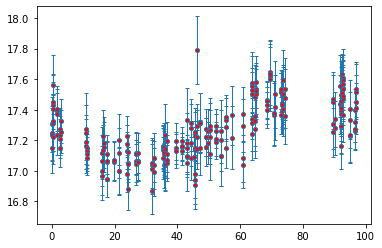

batch=10, count=920
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


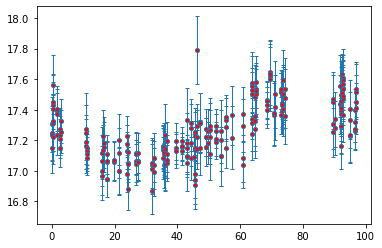

batch=11, count=1012
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


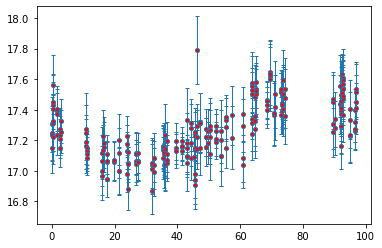

batch=12, count=1104
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


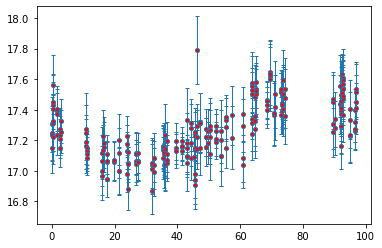

batch=13, count=1196
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


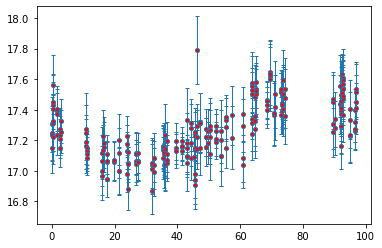

batch=14, count=1288
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


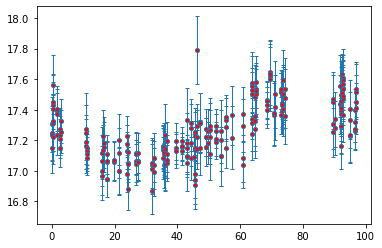

batch=15, count=1380
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


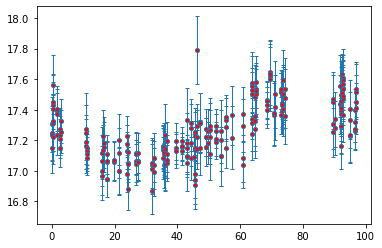

batch=16, count=1472
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


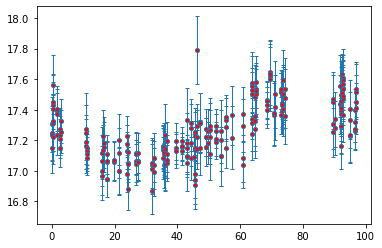

batch=17, count=1564
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


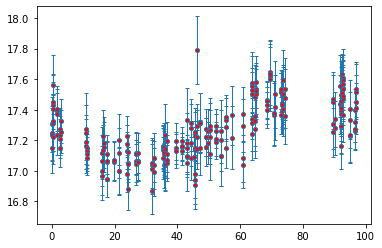

batch=18, count=1656
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


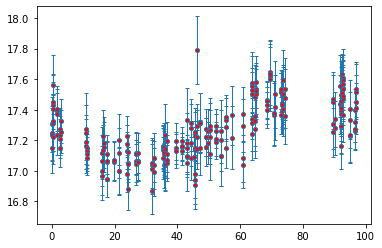

batch=19, count=1748
augmenting
batch=20, count=1782
augmenting
batch=1, count=302
augmenting
batch=2, count=604
augmenting
batch=3, count=906
augmenting
batch=4, count=1208
augmenting
batch=5, count=1510
augmenting
batch=6, count=1573
augmenting
batch=1, count=103
augmenting
batch=2, count=206
augmenting
batch=3, count=309
augmenting
batch=4, count=412
augmenting
batch=5, count=515
augmenting
batch=6, count=618
augmenting
batch=7, count=721
augmenting
batch=8, count=824
augmenting
batch=9, count=927
augmenting
batch=10, count=1030
augmenting
batch=11, count=1133
augmenting
batch=12, count=1236
augmenting
batch=13, count=1339
augmenting
batch=14, count=1442
augmenting
batch=15, count=1545
augmenting
batch=16, count=1648
augmenting
batch=17, count=1751
augmenting
batch=18, count=1772
augmenting
there is an error when generate_GP_simulation, class_label=8, id=3033124094992


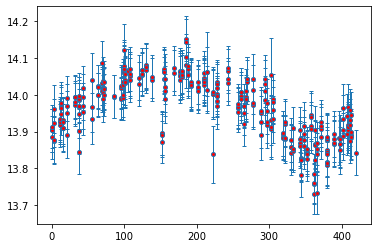

there is an error when generate_GP_simulation, class_label=8, id=3035086033045


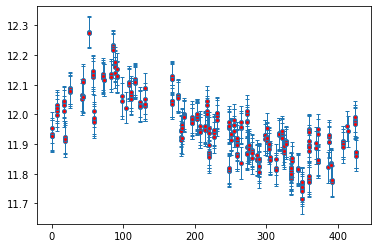

there is an error when generate_GP_simulation, class_label=8, id=3023111062937


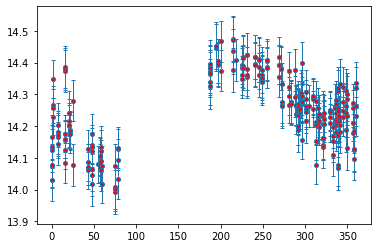

there is an error when generate_GP_simulation, class_label=8, id=3061022032466


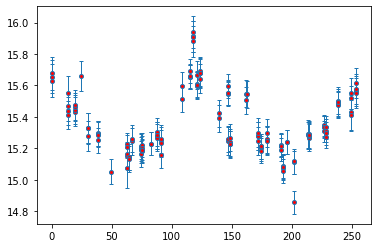

there is an error when generate_GP_simulation, class_label=8, id=3049095074484


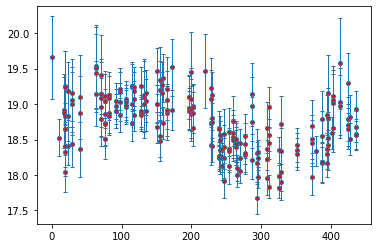

batch=1, count=768
augmenting
there is an error when generate_GP_simulation, class_label=8, id=3033124094992


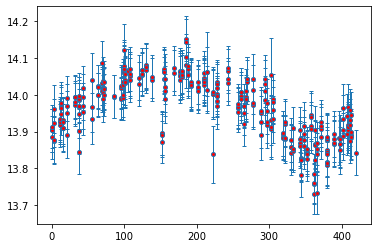

batch=2, count=1102
augmenting
batch=1, count=89
augmenting
batch=2, count=178
augmenting
batch=3, count=267
augmenting
batch=4, count=356
augmenting
batch=5, count=445
augmenting
batch=6, count=534
augmenting
batch=7, count=623
augmenting
batch=8, count=712
augmenting
batch=9, count=801
augmenting
batch=10, count=890
augmenting
batch=11, count=979
augmenting
batch=12, count=1068
augmenting
batch=13, count=1157
augmenting
batch=14, count=1246
augmenting
batch=15, count=1335
augmenting
batch=16, count=1424
augmenting
batch=17, count=1513
augmenting
batch=18, count=1602
augmenting
batch=19, count=1691
augmenting
batch=20, count=1780
augmenting
batch=21, count=1786
augmenting
batch=1, count=93
augmenting
batch=2, count=186
augmenting
batch=3, count=279
augmenting
batch=4, count=372
augmenting
batch=5, count=465
augmenting
batch=6, count=558
augmenting
batch=7, count=651
augmenting
batch=8, count=744
augmenting
batch=9, count=837
augmenting
batch=10, count=930
augmenting
batch=11, count=10

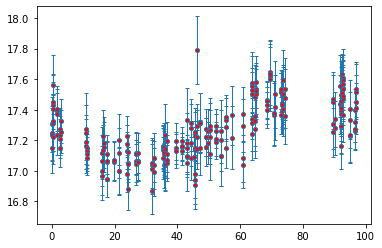

batch=1, count=92
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


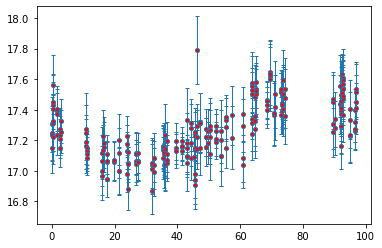

batch=2, count=184
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


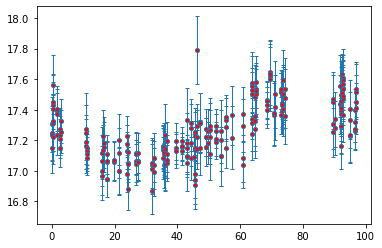

batch=3, count=276
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


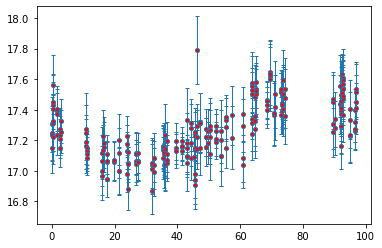

batch=4, count=368
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


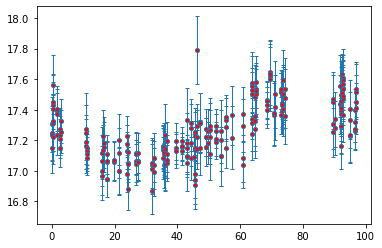

batch=5, count=460
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


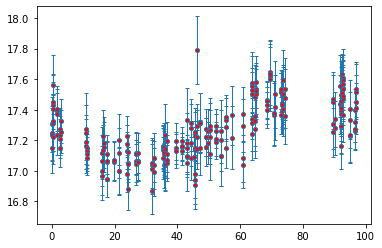

batch=6, count=552
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


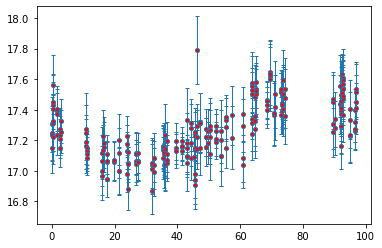

batch=7, count=644
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


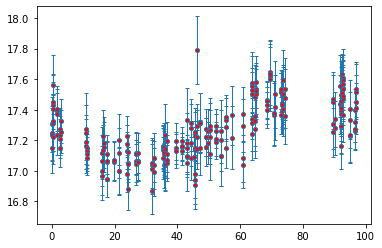

batch=8, count=736
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


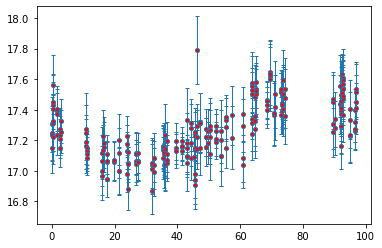

batch=9, count=828
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


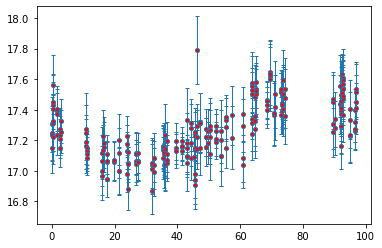

batch=10, count=920
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


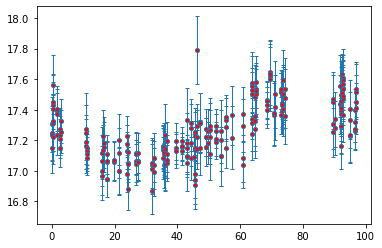

batch=11, count=1012
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


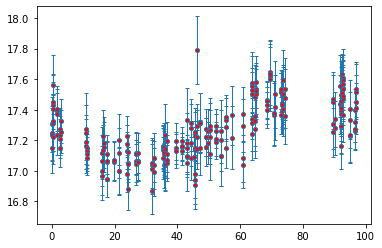

batch=12, count=1104
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


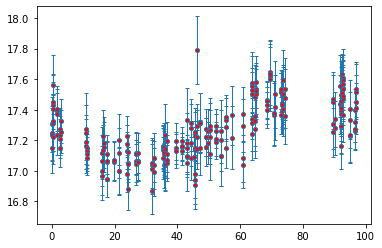

batch=13, count=1196
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


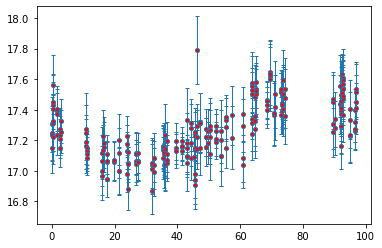

batch=14, count=1288
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


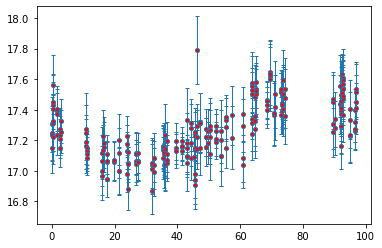

batch=15, count=1380
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


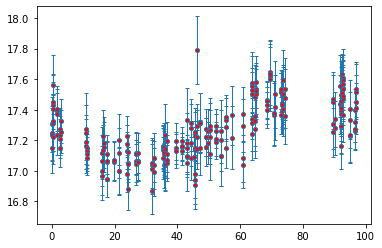

batch=16, count=1472
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


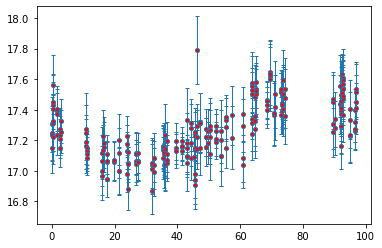

batch=17, count=1564
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


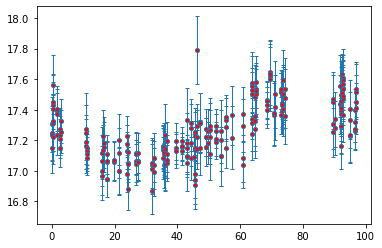

batch=18, count=1656
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


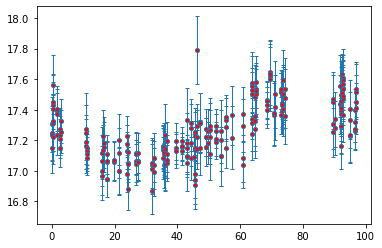

batch=19, count=1748
augmenting
batch=20, count=1782
augmenting
batch=1, count=302
augmenting
batch=2, count=604
augmenting
batch=3, count=906
augmenting
batch=4, count=1208
augmenting
batch=5, count=1510
augmenting
batch=6, count=1573
augmenting
batch=1, count=103
augmenting
batch=2, count=206
augmenting
batch=3, count=309
augmenting
batch=4, count=412
augmenting
batch=5, count=515
augmenting
batch=6, count=618
augmenting
batch=7, count=721
augmenting
batch=8, count=824
augmenting
batch=9, count=927
augmenting
batch=10, count=1030
augmenting
batch=11, count=1133
augmenting
batch=12, count=1236
augmenting
batch=13, count=1339
augmenting
batch=14, count=1442
augmenting
batch=15, count=1545
augmenting
batch=16, count=1648
augmenting
batch=17, count=1751
augmenting
batch=18, count=1772
augmenting
there is an error when generate_GP_simulation, class_label=8, id=3033124094992


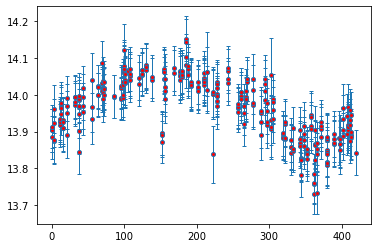

there is an error when generate_GP_simulation, class_label=8, id=3035086033045


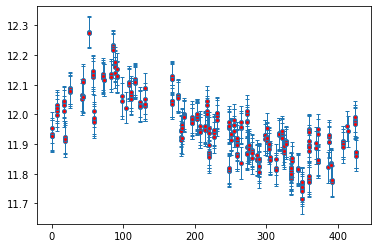

there is an error when generate_GP_simulation, class_label=8, id=3023111062937


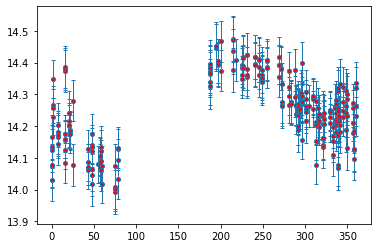

there is an error when generate_GP_simulation, class_label=8, id=3061022032466


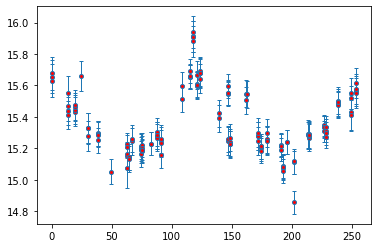

there is an error when generate_GP_simulation, class_label=8, id=3049095074484


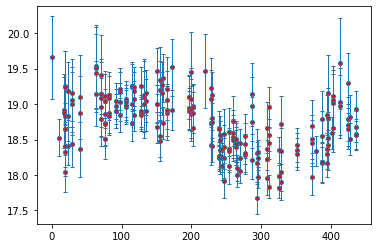

batch=1, count=768
augmenting
there is an error when generate_GP_simulation, class_label=8, id=3033124094992


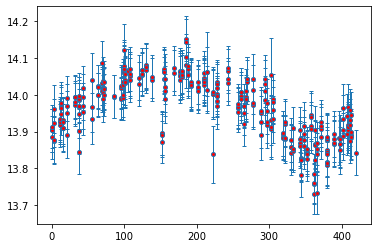

batch=2, count=1102
augmenting
batch=1, count=89
augmenting
batch=2, count=178
augmenting
batch=3, count=267
augmenting
batch=4, count=356
augmenting
batch=5, count=445
augmenting
batch=6, count=534
augmenting
batch=7, count=623
augmenting
batch=8, count=712
augmenting
batch=9, count=801
augmenting
batch=10, count=890
augmenting
batch=11, count=979
augmenting
batch=12, count=1068
augmenting
batch=13, count=1157
augmenting
batch=14, count=1246
augmenting
batch=15, count=1335
augmenting
batch=16, count=1424
augmenting
batch=17, count=1513
augmenting
batch=18, count=1602
augmenting
batch=19, count=1691
augmenting
batch=20, count=1780
augmenting
batch=21, count=1786
augmenting
batch=1, count=93
augmenting
batch=2, count=186
augmenting
batch=3, count=279
augmenting
batch=4, count=372
augmenting
batch=5, count=465
augmenting
batch=6, count=558
augmenting
batch=7, count=651
augmenting
batch=8, count=744
augmenting
batch=9, count=837
augmenting
batch=10, count=930
augmenting
batch=11, count=10

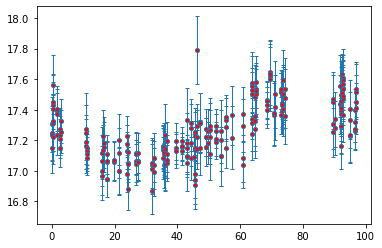

batch=1, count=92
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


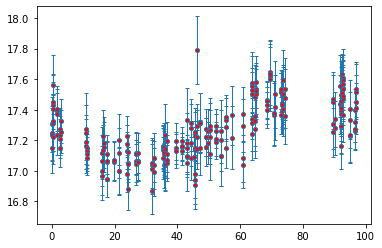

batch=2, count=184
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


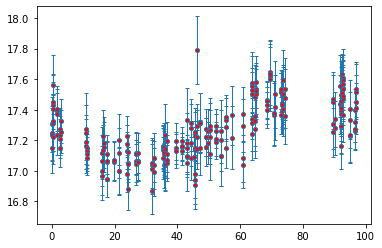

batch=3, count=276
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


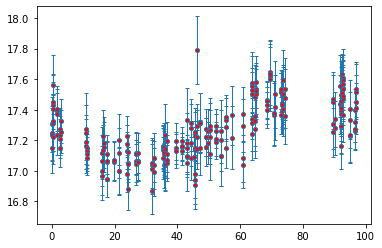

batch=4, count=368
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


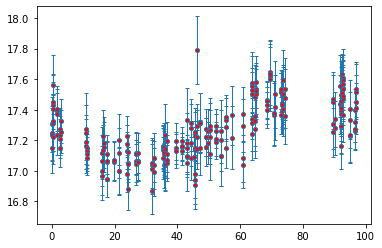

batch=5, count=460
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


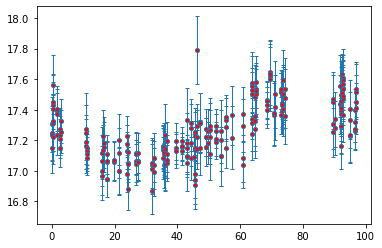

batch=6, count=552
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


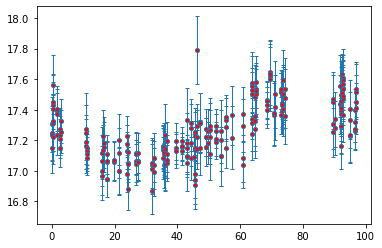

batch=7, count=644
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


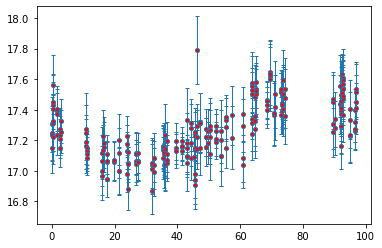

batch=8, count=736
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


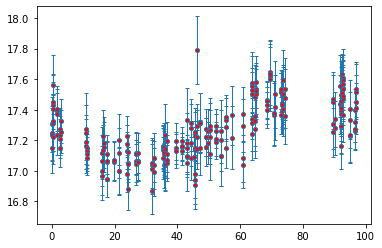

batch=9, count=828
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


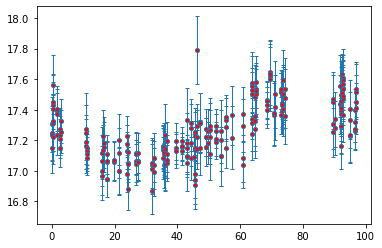

batch=10, count=920
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


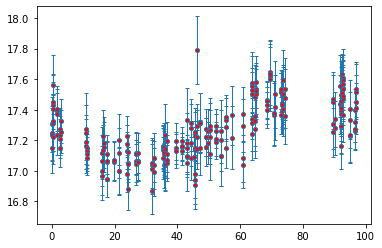

batch=11, count=1012
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


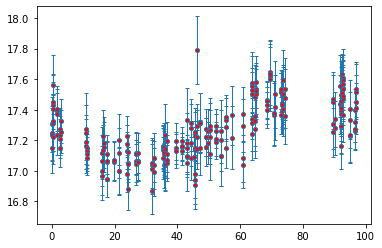

batch=12, count=1104
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


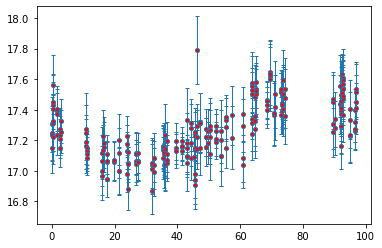

batch=13, count=1196
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


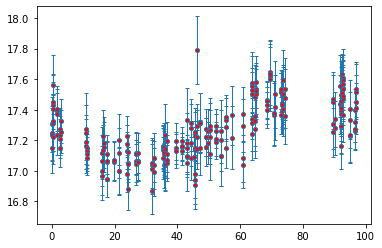

batch=14, count=1288
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


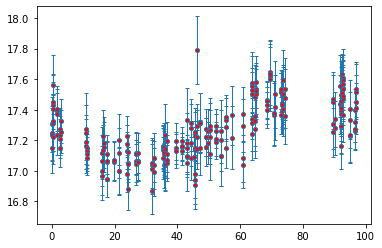

batch=15, count=1380
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


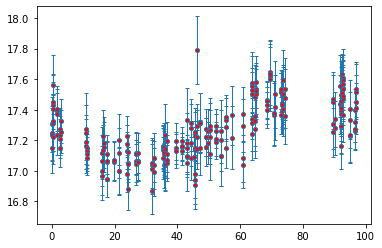

batch=16, count=1472
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


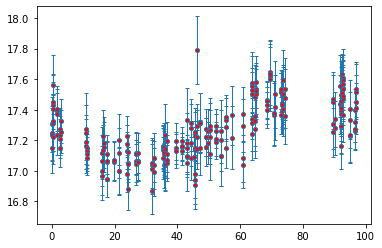

batch=17, count=1564
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


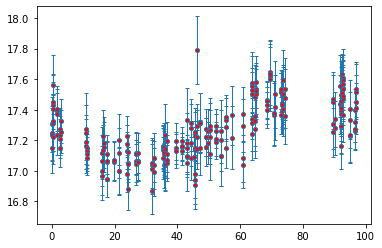

batch=18, count=1656
augmenting
there is an error when generate_GP_simulation, class_label=11, id=3035017018795


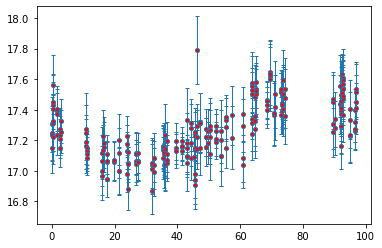

batch=19, count=1748
augmenting
batch=20, count=1782


In [2]:
from util import create_dataset 
for i in range(0,10):   
    create_dataset('data/original_dataset_0.60_0.30_0.10', 1875, down_sample=True, aug_val=True,image=True, instance=i)